In [2]:
import numpy as np
import anndata as ad
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.stats import zscore
import scvelo as scv

In [3]:
NR1_2 =sc.read_h5ad('F:/spatial/V2L/NR1_2/spatial_transfer_digital_layer_13.h5ad')

In [4]:
NR2_2 =sc.read_h5ad('F:/spatial/V2L/NR2_2/spatial_transfer_digital_layer_12.h5ad')

In [6]:
NR = NR1_2.concatenate(NR2_2,batch_categories=['NR1_2', 'NR2_2'],batch_key='slice',index_unique=None,join='outer')

In [406]:
#NR1_2 = NR1_2[NR1_2.obs['Subclass_transfer']=='L2/3 IT CTX']

In [407]:
#NR1_l23 = NR1_2[NR1_2.obs['digital_layer'].between(1, 5.5)]

In [7]:
NR_L23 = NR[NR.obs['Subclass_transfer']=='L2/3 IT CTX']

In [9]:
NR_L23

View of AnnData object with n_obs × n_vars = 758 × 26636
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice'
    obsm: 'stereo'
    layers: 'imputed'

In [8]:
NR_l23 = NR_L23[NR_L23.obs['digital_layer'].between(2, 4)]

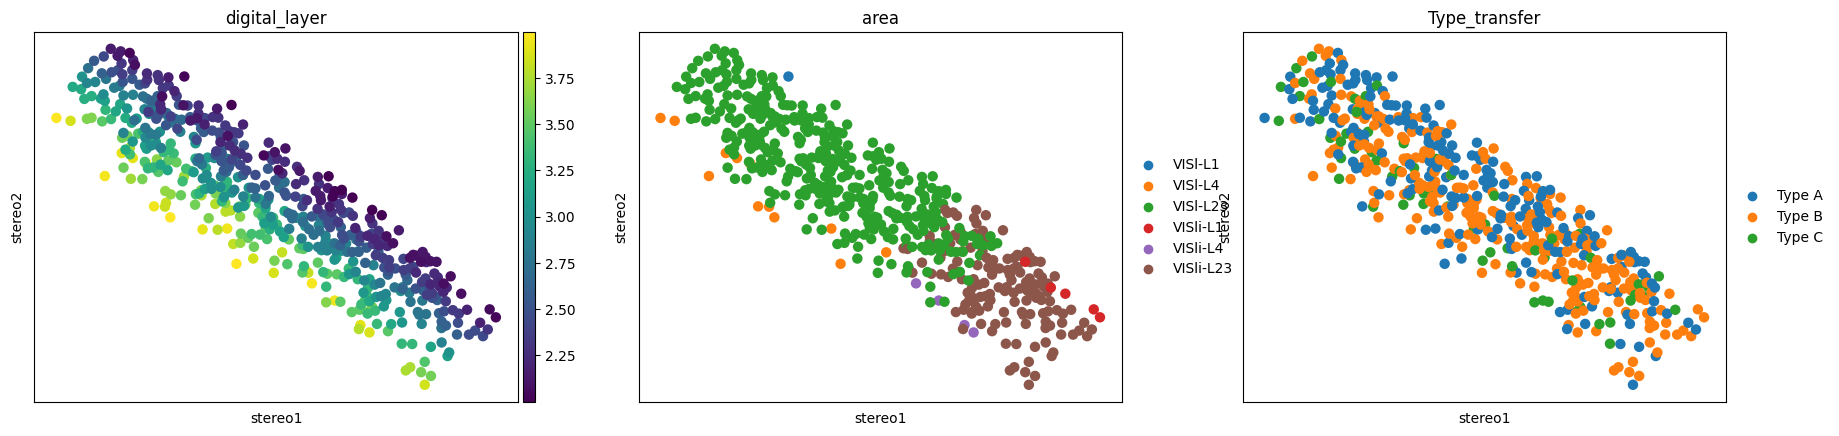

In [9]:
sc.pl.embedding(NR_l23, basis='stereo',color=['digital_layer','area','Type_transfer'],alpha=None)

In [10]:
NR_V2L_L23_PC1gene = pd.read_csv('F:/spatial/V2L/NR_V2L_L23_PC1rank.csv',index_col='Gene')

In [11]:
NR_V2L_L23_PC1gene

""
Gene
Rasl12
Bid
Rasa3
Txndc16
Gm19500
...
Sorcs3
Kirrel3
Robo1


In [12]:
adata_index =NR_l23.var.index.astype(str)

In [13]:
adata_index

Index(['0610005C13Rik', '0610006L08Rik', '0610009B22Rik', '0610009O20Rik',
       '0610010F05Rik', '0610010K14Rik', '0610012D04Rik', '0610012G03Rik',
       '0610025J13Rik', '0610030E20Rik',
       ...
       'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1', 'mt-Nd2', 'mt-Nd3', 'mt-Nd4',
       'mt-Nd4l', 'mt-Nd5', 'mt-Nd6'],
      dtype='object', length=26636)

In [14]:
PC1_index =NR_V2L_L23_PC1gene.index.astype(str)

In [15]:
PC1_index

Index(['Rasl12', 'Bid', 'Rasa3', 'Txndc16', 'Gm19500', 'Tyrobp', 'Zfp652',
       '5031439G07Rik', 'Ppp1r18', 'Grm3',
       ...
       'Gpc6', 'Pde7b', 'Ptprk', 'Slc24a2', '6530403H02Rik', 'Sorcs3',
       'Kirrel3', 'Robo1', 'Cntn5', 'Cdh13'],
      dtype='object', name='Gene', length=674)

In [16]:
common_index  =PC1_index.intersection(adata_index)

In [17]:
common_index

Index(['Rasl12', 'Bid', 'Rasa3', 'Txndc16', 'Tyrobp', 'Zfp652',
       '5031439G07Rik', 'Ppp1r18', 'Grm3', '1810062O18Rik',
       ...
       'Gpc6', 'Pde7b', 'Ptprk', 'Slc24a2', '6530403H02Rik', 'Sorcs3',
       'Kirrel3', 'Robo1', 'Cntn5', 'Cdh13'],
      dtype='object', length=647)

In [18]:
NR_l23_PC1 =NR_l23[:,common_index]

In [18]:
# 备份原始数据的 X 矩阵
NR_L23.layers['original_X'] = NR_L23.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR_L23.X = NR_L23.layers['imputed'].copy()
# 若存在 NaN 值，可以用 0 填充，或其他适合的值
NR_L23.X = np.nan_to_num(NR_L23.X, nan=0)

In [19]:
# 备份原始数据的 X 矩阵
NR_l23.layers['original_X'] = NR_l23.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR_l23.X = NR_l23.layers['imputed'].copy()
NR_l23.X = np.nan_to_num(NR_l23.X, nan=0)

In [20]:
# 备份原始数据的 X 矩阵
NR_l23_PC1.layers['original_X'] = NR_l23_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
NR_l23_PC1.X = NR_l23_PC1.layers['imputed'].copy()
NR_l23_PC1.X = np.nan_to_num(NR_l23_PC1.X, nan=0)

In [21]:
# 若存在 NaN 值，可以用 0 填充，或其他适合的值
NR_l23.X = np.nan_to_num(NR_l23.X, nan=0)

NR_l23_PC1.X = np.nan_to_num(NR_l23_PC1.X, nan=0)

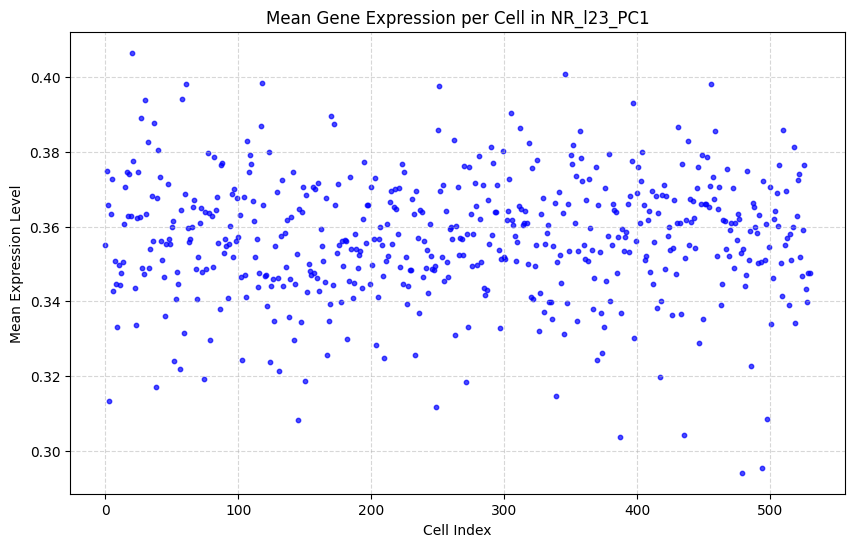

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = NR_l23_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in NR_l23_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [21]:
# Step 1: 获取基因表达数据
g = NR_l23_PC1.X.mean(axis=1).flatten()

# Step 2: 计算 vmin 和 vmax
vmin, vmax = np.percentile(g, 1), np.percentile(g, 99)

# Step 3: 创建布尔掩码
mask = (g >= vmin) & (g <= vmax)

# Step 4: 提取满足条件的细胞
filtered_NR_l23_PC1 = NR_l23_PC1[mask]
removed_cells = NR_l23_PC1.obs.index[~mask]  # 获取被移除的细胞索引

# Step 5: 确保索引对齐并在 NR_DGsg 中去掉相同细胞
common_indices = NR_l23.obs.index.intersection(NR_l23.obs.index)  # 获取共享索引
filtered_NR_l23 = NR_l23[common_indices]  # 首先确保索引对齐
filtered_NR_l23 = filtered_NR_l23[~filtered_NR_l23.obs.index.isin(removed_cells)]  # 再移除细胞

# 打印结果
print(f"原始 NR_l23_PC1 细胞数: {NR_l23_PC1.n_obs}, 筛选后: {filtered_NR_l23_PC1.n_obs}")
print(f"原始 NR_l23 细胞数: {NR_l23.n_obs}, 筛选后: {filtered_NR_l23.n_obs}")


原始 NR_l23_PC1 细胞数: 531, 筛选后: 519
原始 NR_l23 细胞数: 531, 筛选后: 519


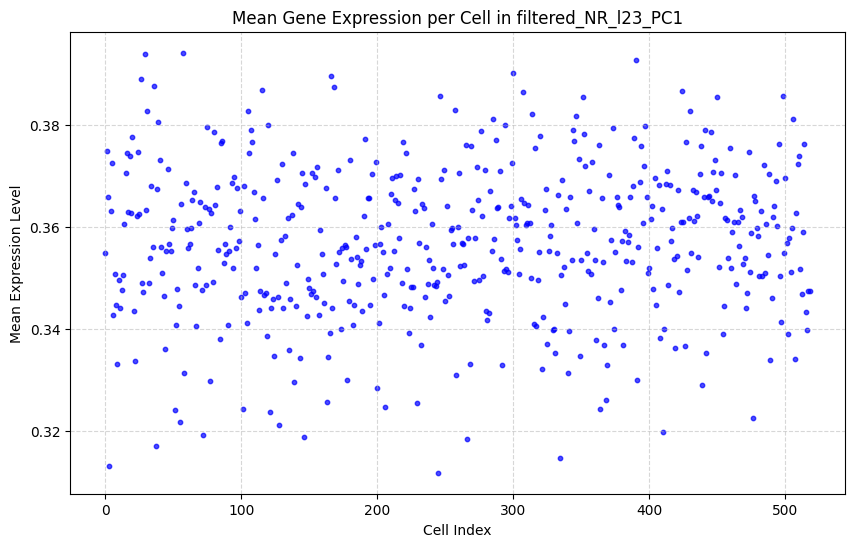

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = filtered_NR_l23_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in filtered_NR_l23_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


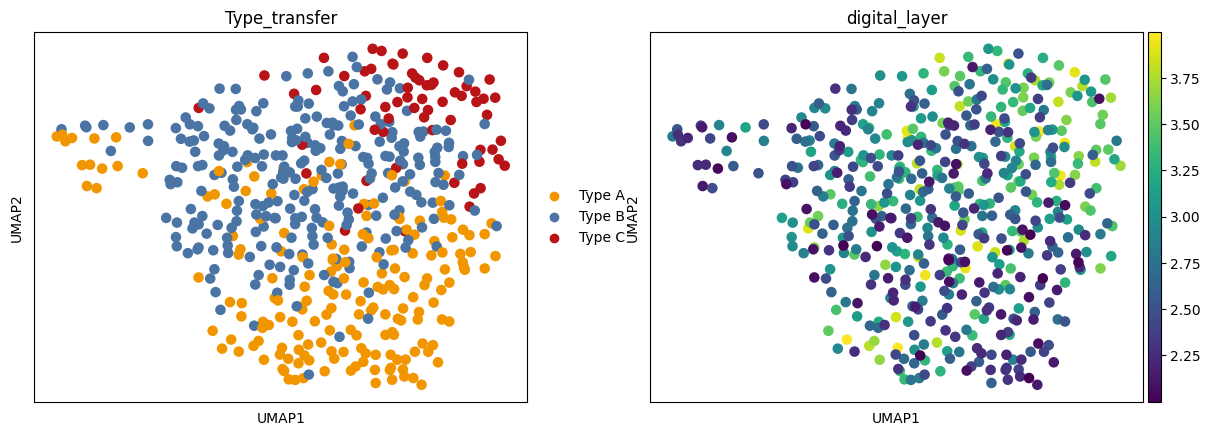

In [25]:
sc.pp.pca(filtered_NR_l23_PC1)
sc.pp.neighbors(filtered_NR_l23_PC1,use_rep='X_pca')
sc.tl.umap(filtered_NR_l23_PC1)
sc.pl.umap(filtered_NR_l23_PC1, color=['Type_transfer','digital_layer'],palette=["#f29600", "#4974a4", "#b81316"])

In [250]:
N_l23_umap = filtered_NR_l23_PC1.obsm['X_umap'][:,0]

In [86]:
N_l23_umapy[506]

20.00362

In [251]:
np.argmin(N_l23_umap).max(axis=0)

285

In [221]:
np.argmax(N_l23_umap).max(axis=0)

368

In [252]:
filtered_NR_l23_PC1[filtered_NR_l23_PC1.obs.index[285]].obs 

,orig.ident,nCount_Spatial,nFeature_Spatial,area,coor_x,coor_y,areaL1,coor_x_ad,coor_y_ad,left_right,areaL2,ident,integration_partition_transfer,integration_partition_confidence,Subclass_transfer,Subclass_confidence,Type_transfer,Type_confidence,digital_layer,slice
106563,Spatial,735.0,447,VISl-L23,16532,19343,V2L,14344.827754,10795.433298,right,Cortex,region,p186,0.629358,L2/3 IT CTX,1.0,Type C,0.641841,3.312788,NR2_2


In [767]:
NR_l23_PC1[NR_l23_PC1.obs.index[1073]].obs

,orig.ident,nCount_Spatial,nFeature_Spatial,area,coor_x,coor_y,areaL1,coor_x_ad,coor_y_ad,left_right,...,integration_partition_confidence,Subclass_transfer,Subclass_confidence,Type_transfer,Type_confidence,digital_layer,slice,leiden,highlight,dpt_pseudotime
95936,Spatial,639.0,332,VISp-L23,14701,20431,V1,12476.972497,11818.869539,right,...,0.937218,L2/3 IT CTX,1.0,L2/3 IT CTX C,0.75402,3.84287,NR2_2,1,True,0.0


In [26]:
sc.pp.neighbors(filtered_NR_l23_PC1,use_rep='X_pca')
sc.tl.diffmap(filtered_NR_l23_PC1)
filtered_NR_l23_PC1.uns['iroot'] = np.flatnonzero(filtered_NR_l23_PC1.obs.index  == '104827')[0]
sc.tl.dpt(filtered_NR_l23_PC1)

In [27]:
filtered_NR_l23_PC1.write_h5ad('filtered_NR_l23_PC1_spatial.h5ad')

In [18]:
filtered_NR_l23_PC1=sc.read_h5ad('filtered_NR_l23_PC1_spatial.h5ad')

In [147]:
NR_l23_PC1

AnnData object with n_obs × n_vars = 531 × 647
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice'
    uns: 'area_colors', 'Type_transfer_colors'
    obsm: 'stereo'
    layers: 'imputed', 'original_X'

saving figure to file ./figures/scvelo_NR_l23_dpt.pdf


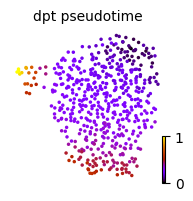

saving figure to file ./figures/scvelo_NR_l23_celltype.pdf


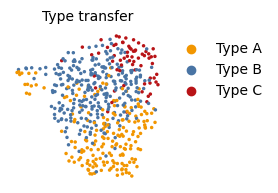

saving figure to file ./figures/scvelo_NR_l23_digital_layer.pdf


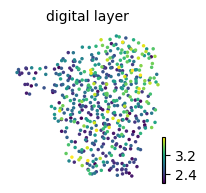

In [6]:
scv.pl.scatter(filtered_NR_l23_PC1, basis='X_umap',color='dpt_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),size=25,save='NR_l23_dpt.pdf')
scv.pl.umap(filtered_NR_l23_PC1, color='Type_transfer',palette=["#f29600","#4974a4","#b81316"],figsize=(2,2),size=25,save='NR_l23_celltype.pdf')
scv.pl.umap(filtered_NR_l23_PC1, color='digital_layer',figsize=(2,2),size=25,save='NR_l23_digital_layer.pdf')

In [213]:
filtered_NR_l23_PC1

AnnData object with n_obs × n_vars = 519 × 647
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'dpt_pseudotime'
    uns: 'area_colors', 'Type_transfer_colors', 'pca', 'neighbors', 'umap', 'diffmap_evals', 'iroot'
    obsm: 'stereo', 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'
    layers: 'imputed', 'original_X'
    obsp: 'distances', 'connectivities'

In [16]:
# 将数据导出为 DataFrame，方便操作
df = filtered_NR_l23_PC1.obs[['dpt_pseudotime', 'Type_transfer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 为每个 Type_transfer 设定颜色（可以根据实际需要修改配色）
type_colors = {
    'Type A': "#f29600",  # 示例颜色
    'Type B': "#4974a4",
    'Type C': "#b81316"
}

# 为每个细胞匹配对应的颜色
df_sorted['color'] = df_sorted['Type_transfer'].map(type_colors)
color_rgb = np.array([mcolors.to_rgba(color) for color in df_sorted['color']])

# 将颜色数组 reshape 为 1 行
color_array = color_rgb.reshape(1, -1, 4)  # 4 表示 RGBA 颜色通道

# 绘制条状图
plt.figure(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
plt.imshow(color_array, aspect="auto")
plt.axis("off")  # 去掉轴
plt.title("NR cells Sorted by DPT Pseudotime with Type_transfer Colors")
#plt.show()
# 保存为 PDF
output_path = "F:/spatial/V2L/figures/V2L_NR_l23_sorted_dpt_pseudotime.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/V2L/figures/V2L_NR_l23_sorted_dpt_pseudotime.pdf


In [26]:


# 将数据导出为 DataFrame，方便操作
df = filtered_NR_l23_PC1.obs[['dpt_pseudotime', 'digital_layer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 创建一个黑白颜色映射
cmap = plt.cm.Greys  # 使用黑白的 'Greys' 颜色映射
norm = mcolors.Normalize(vmin=df_sorted['digital_layer'].min(), vmax=df_sorted['digital_layer'].max())
colors = cmap(norm(df_sorted['digital_layer']))

# 将颜色数组转换为二维数组以用于绘制条状图
color_bar = colors[::-1].reshape(1,-1,4) # 高度为1，宽度为细胞数量，4是RGBA通道数

# 绘制条状图和颜色图例
fig, ax = plt.subplots(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
im = ax.imshow(color_bar, aspect="auto")  # 确保颜色条为黑白
ax.axis("off")  # 去掉轴
plt.title("NR cells spatial depth along Pseudotime")

# 添加颜色条作为图例，并去掉数值显示
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation="horizontal", pad=0.2)
cbar.set_label('Spatial Depth')  # 自定义颜色条标签
cbar.set_ticks([])  # 去掉颜色条上的数值
# 添加左右侧标签
cbar.ax.text(-0.25, 0.5, 'Upper Layer', ha='center', va='center', transform=cbar.ax.transAxes, color='black')
cbar.ax.text(1.25, 0.5, 'Deep Layer', ha='center', va='center', transform=cbar.ax.transAxes, color='black')

#plt.show()
output_path = "F:/spatial/V2L/figures/V2L_NR_l23_cortical_depth_dpt_pseudotime.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/figures/V2L_NR_l23_cortical_depth_dpt_pseudotime.pdf


In [5]:
DR1_2 =sc.read_h5ad('F:/spatial/V2L/DR1_2/spatial_transfer_digital_layer_10.h5ad')
DR2_2 =sc.read_h5ad('F:/spatial/V2L/DR2_2/spatial_transfer_digital_layer_17.h5ad')

In [23]:
DR = DR1_2.concatenate(DR2_2,batch_categories=['DR1_2', 'DR2_2'],batch_key='slice',index_unique=None,join='outer')

In [24]:
DR_L23 = DR[DR.obs['Subclass_transfer']=='L2/3 IT CTX']

In [25]:
DR_l23 = DR_L23[DR_L23.obs['digital_layer'].between(2, 4)]

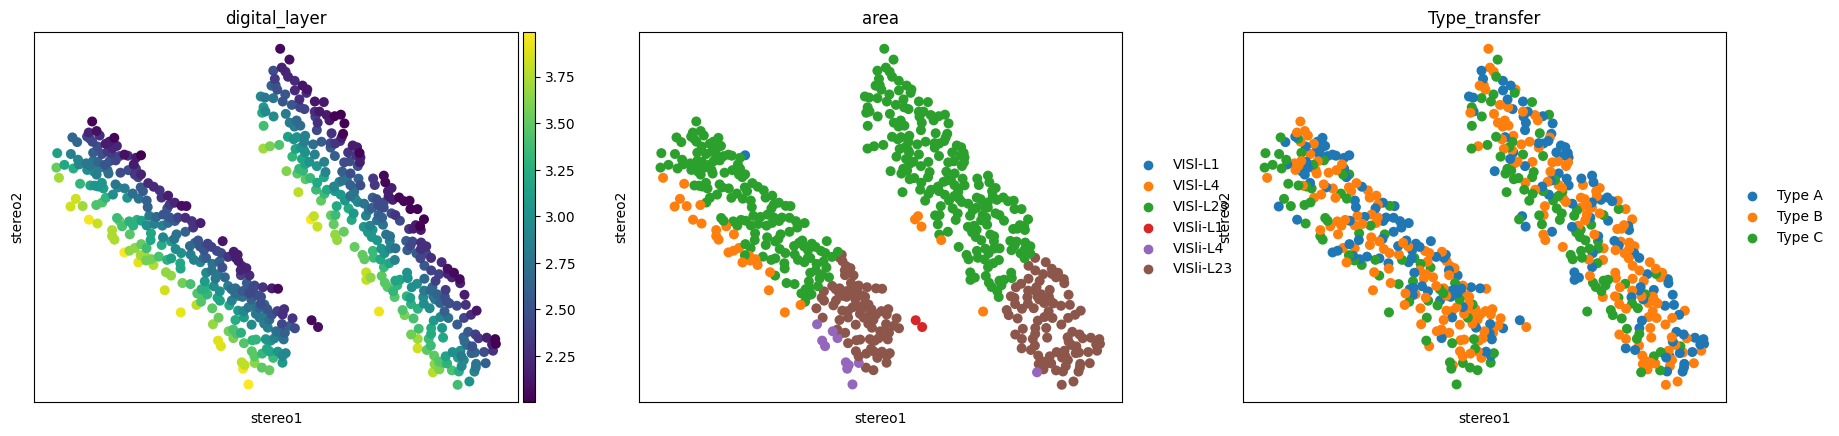

In [26]:
sc.pl.embedding(DR_l23, basis='stereo',color=['digital_layer','area','Type_transfer'],alpha=None)

In [27]:
DR_V2L_L23_PC1gene = pd.read_csv('F:/spatial/V2L/DR_V2L_L23_PC1rank.csv',index_col='Gene')

In [28]:
DR_V2L_L23_PC1gene

""
Gene
Ppfibp1
Pmepa1
Ppp1r18
Gm19500
Lamp2
...
Epha6
Dpyd
6530403H02Rik


In [29]:
adata_index =DR_l23.var.index.astype(str)

In [30]:
PC1_index =DR_V2L_L23_PC1gene.index.astype(str)

In [31]:
common_index  =PC1_index.intersection(adata_index)

In [32]:
common_index

Index(['Ppfibp1', 'Pmepa1', 'Ppp1r18', 'Lamp2', 'Rasl12', 'Ypel2', 'Osbpl11',
       'Cnp', 'Cdk19', 'Bid',
       ...
       'Cntnap2', 'Kirrel3', 'Hs6st3', 'Kcnq5', 'Etl4', 'Epha6', 'Dpyd',
       '6530403H02Rik', 'Cntn5', 'Cdh13'],
      dtype='object', length=648)

In [33]:
DR_l23_PC1 =DR_l23[:,common_index]

In [34]:
# 备份原始数据的 X 矩阵
DR_l23.layers['original_X'] = DR_l23.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
DR_l23.X = DR_l23.layers['imputed'].copy()

In [35]:
# 备份原始数据的 X 矩阵
DR_l23_PC1.layers['original_X'] = DR_l23_PC1.X.copy()

# 将 'imputed' layer 复制到 X 矩阵
DR_l23_PC1.X = DR_l23_PC1.layers['imputed'].copy()

In [36]:
# 若存在 NaN 值，可以用 0 填充，或其他适合的值
DR_l23.X = np.nan_to_num(DR_l23.X, nan=0)

In [37]:
DR_l23_PC1.X = np.nan_to_num(DR_l23_PC1.X, nan=0)

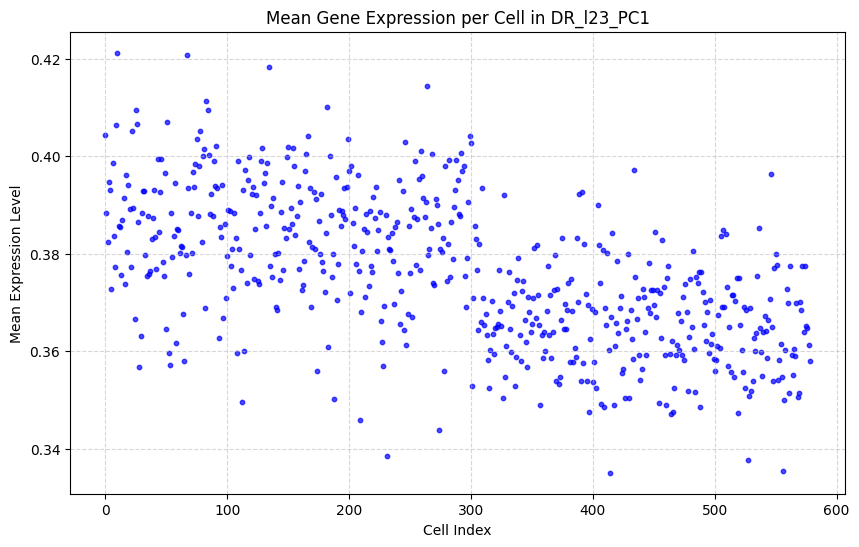

In [47]:
# 计算每个细胞的平均表达量
cell_mean_expression = DR_l23_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in DR_l23_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [38]:
# Step 1: 获取基因表达数据
g = DR_l23_PC1.X.mean(axis=1).flatten()

# Step 2: 计算 vmin 和 vmax
vmin, vmax = np.percentile(g, 1), np.percentile(g, 99)

# Step 3: 创建布尔掩码
mask = (g >= vmin) & (g <= vmax)

# Step 4: 提取满足条件的细胞
filtered_DR_l23_PC1 = DR_l23_PC1[mask]
removed_cells = DR_l23_PC1.obs.index[~mask]  # 获取被移除的细胞索引

# Step 5: 确保索引对齐并在 DR_DGsg 中去掉相同细胞
common_indices = DR_l23.obs.index.intersection(DR_l23.obs.index)  # 获取共享索引
filtered_DR_l23 = DR_l23[common_indices]  # 首先确保索引对齐
filtered_DR_l23 = filtered_DR_l23[~filtered_DR_l23.obs.index.isin(removed_cells)]  # 再移除细胞

# 打印结果
print(f"原始 DR_l23_PC1 细胞数: {DR_l23_PC1.n_obs}, 筛选后: {filtered_DR_l23_PC1.n_obs}")
print(f"原始 DR_l23 细胞数: {DR_l23.n_obs}, 筛选后: {filtered_DR_l23.n_obs}")


原始 DR_l23_PC1 细胞数: 579, 筛选后: 567
原始 DR_l23 细胞数: 579, 筛选后: 567


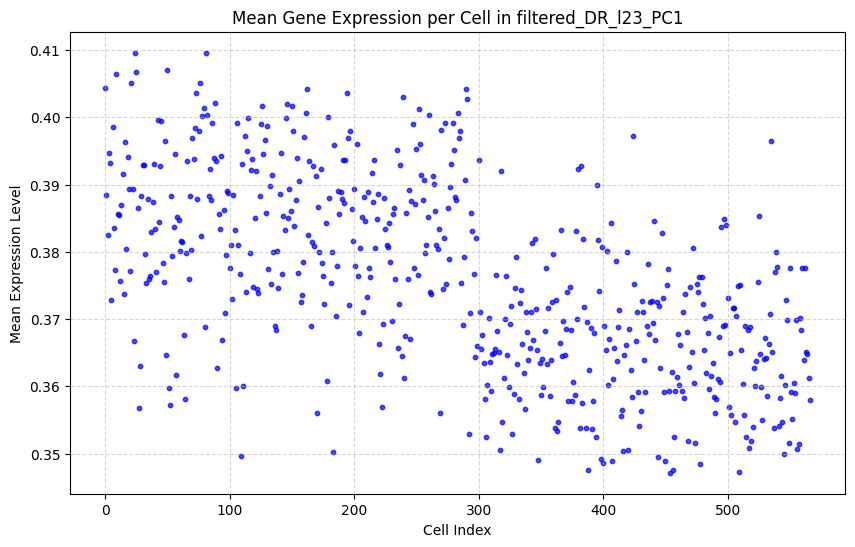

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 计算每个细胞的平均表达量
cell_mean_expression = filtered_DR_l23_PC1.X.mean(axis=1).flatten()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cell_mean_expression)), cell_mean_expression, s=10, alpha=0.7, color='blue')
plt.xlabel('Cell Index')
plt.ylabel('Mean Expression Level')
plt.title('Mean Gene Expression per Cell in filtered_DR_l23_PC1')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


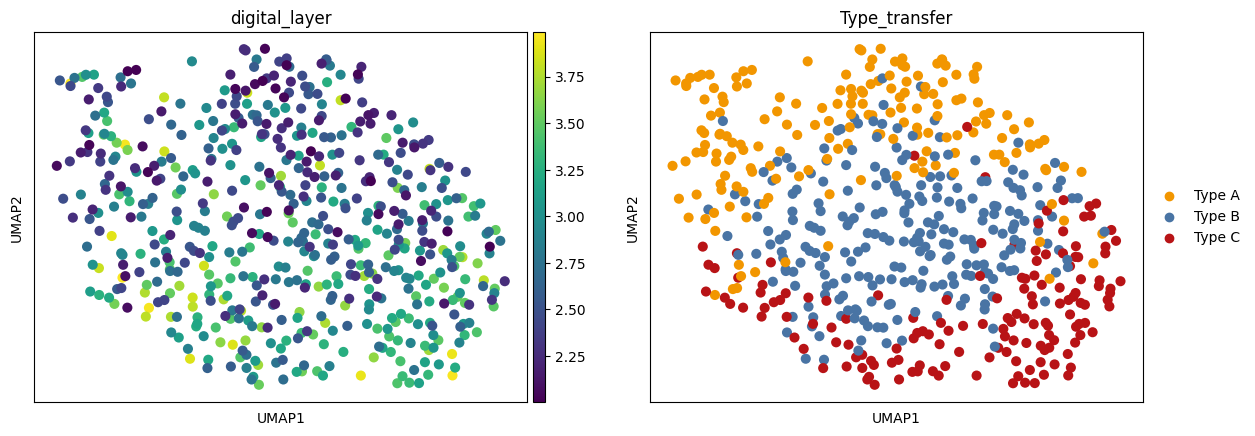

In [50]:
sc.pp.pca(filtered_DR_l23_PC1)
sc.pp.neighbors(filtered_DR_l23_PC1,use_rep='X_pca')
sc.tl.umap(filtered_DR_l23_PC1)
sc.pl.umap(filtered_DR_l23_PC1, color=['digital_layer','Type_transfer'],palette=["#f29600", "#4974a4", "#b81316"])

In [193]:
D_l23_umap = filtered_DR_l23_PC1.obsm['X_umap'][:,1]


In [194]:
np.argmin(D_l23_umap).max(axis=0)

240

In [173]:
D_l23_umap[210]

-2.4101958

In [174]:
D_l23_umapx = DR_l23_PC1.obsm['X_umap'][:,0]
D_l23_umap

array([ 5.6121478e+00,  7.2818124e-01, -4.2253613e-01, ...,
        1.5657728e+00,  1.2542317e+00,  5.2270433e-03], dtype=float32)

In [175]:
D_l23_umapx[210]

4.0313797

In [195]:
filtered_DR_l23_PC1[filtered_DR_l23_PC1.obs.index[240]].obs 

,orig.ident,nCount_Spatial,nFeature_Spatial,area,coor_x,coor_y,areaL1,coor_x_ad,coor_y_ad,left_right,areaL2,ident,integration_partition_transfer,integration_partition_confidence,Subclass_transfer,Subclass_confidence,Type_transfer,Type_confidence,digital_layer,slice
11235,Spatial,637.0,325,VISl-L4,11248,11178,V2L,13869.845202,10447.455305,right,Cortex,region,p24,0.808438,L2/3 IT CTX,1.0,Type C,0.762356,3.967929,DR1_2


In [51]:
sc.pp.neighbors(filtered_DR_l23_PC1,use_rep='X_pca')
sc.tl.diffmap(filtered_DR_l23_PC1)
filtered_DR_l23_PC1.uns['iroot'] = np.flatnonzero(filtered_DR_l23_PC1.obs.index  == '11235')[0]
sc.tl.dpt(filtered_DR_l23_PC1)

saving figure to file ./figures/scvelo_DR_l23_dpt.pdf


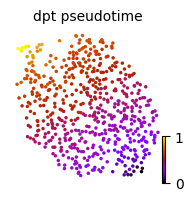

saving figure to file ./figures/scvelo_DR_l23_Type.pdf


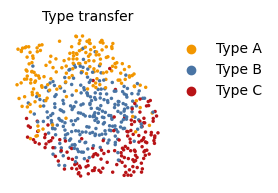

saving figure to file ./figures/scvelo_DR_l23_digital_layer.pdf


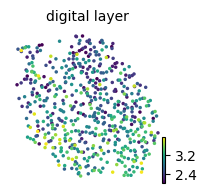

In [12]:
scv.pl.scatter(filtered_DR_l23_PC1, basis='X_umap',color='dpt_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),size=25,save='DR_l23_dpt.pdf')
scv.pl.umap(filtered_DR_l23_PC1, color='Type_transfer',palette=["#f29600","#4974a4","#b81316"],figsize=(2,2),size=25,save='DR_l23_Type.pdf')
scv.pl.umap(filtered_DR_l23_PC1, color='digital_layer',figsize=(2,2),size=25,save='DR_l23_digital_layer.pdf')

In [53]:
filtered_DR_l23_PC1.write_h5ad('filtered_DR_l23_PC1_spatial.h5ad')

In [24]:
filtered_DR_l23_PC1=sc.read_h5ad('filtered_DR_l23_PC1_spatial.h5ad')

In [13]:
# 将数据导出为 DataFrame，方便操作
df = filtered_DR_l23_PC1.obs[['dpt_pseudotime', 'Type_transfer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 为每个 Type_transfer 设定颜色（可以根据实际需要修改配色）
type_colors = {
    'Type A': "#f29600",  # 示例颜色
    'Type B': "#4974a4",
    'Type C': "#b81316"
}

# 为每个细胞匹配对应的颜色
df_sorted['color'] = df_sorted['Type_transfer'].map(type_colors)
color_rgb = np.array([mcolors.to_rgba(color) for color in df_sorted['color']])

# 将颜色数组 reshape 为 1 行
color_array = color_rgb.reshape(1, -1, 4)  # 4 表示 RGBA 颜色通道

# 绘制条状图
plt.figure(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
plt.imshow(color_array, aspect="auto")
plt.axis("off")  # 去掉轴
plt.title("Cells Sorted by DPT Pseudotime with Type_transfer Colors")
#plt.show()
output_path = "F:/spatial/V2L/figures/V2L_DR_l23_sorted_dpt_pseudotime.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/figures/V2L_DR_l23_sorted_dpt_pseudotime.pdf


In [28]:

# 将数据导出为 DataFrame，方便操作
df = filtered_DR_l23_PC1.obs[['dpt_pseudotime', 'digital_layer']].copy()

# 按照 dpt_pseudotime 进行排序
df_sorted = df.sort_values(by='dpt_pseudotime')

# 创建一个黑白颜色映射
cmap = plt.cm.Greys  # 使用黑白的 'Greys' 颜色映射
norm = mcolors.Normalize(vmin=df_sorted['digital_layer'].min(), vmax=df_sorted['digital_layer'].max())
colors = cmap(norm(df_sorted['digital_layer']))

# 将颜色数组转换为二维数组以用于绘制条状图
color_bar = colors[::-1].reshape(1,-1,4) # 高度为1，宽度为细胞数量，4是RGBA通道数

# 绘制条状图和颜色图例
fig, ax = plt.subplots(figsize=(12, 1))  # 调整宽度和高度以获得更细的条
im = ax.imshow(color_bar, aspect="auto")  # 确保颜色条为黑白
ax.axis("off")  # 去掉轴
plt.title("DR cells spatial depth along Pseudotime")

# 添加颜色条作为图例，并去掉数值显示
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation="horizontal", pad=0.2)
cbar.set_label('Spatial Depth')  # 自定义颜色条标签
cbar.set_ticks([])  # 去掉颜色条上的数值
# 添加左右侧标签
cbar.ax.text(-0.25, 0.5, 'Upper Layer', ha='center', va='center', transform=cbar.ax.transAxes, color='black')
cbar.ax.text(1.25, 0.5, 'Deep Layer', ha='center', va='center', transform=cbar.ax.transAxes, color='black')

#plt.show()
output_path = "F:/spatial/V2L/figures/V2L_DR_l23_sorted_dpt_pseudotime_cortical_depth.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/figures/V2L_DR_l23_sorted_dpt_pseudotime_cortical_depth.pdf


In [24]:
NR_l23_PC1=sc.read_h5ad('NR_l23_PC1_spatial.h5ad')

In [56]:
sc.pp.pca(filtered_NR_l23_PC1)

In [57]:
filtered_NR_l23_PC1.obs['PC1']= filtered_NR_l23_PC1.obsm['X_pca'][:,0]

In [58]:
filtered_NR_l23_PC1_2 = filtered_NR_l23_PC1[filtered_NR_l23_PC1.obs['slice']=='NR1_2']

filtered_NR_l23_PC2_2 = filtered_NR_l23_PC1[filtered_NR_l23_PC1.obs['slice']=='NR2_2']

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


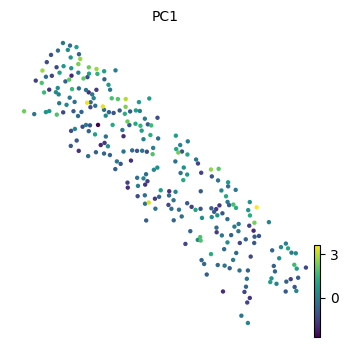

In [59]:
scv.pl.scatter(filtered_NR_l23_PC1_2, basis='stereo',color='PC1',cmap='viridis',legend_loc='right margin',figsize=(4,4),size=40)

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


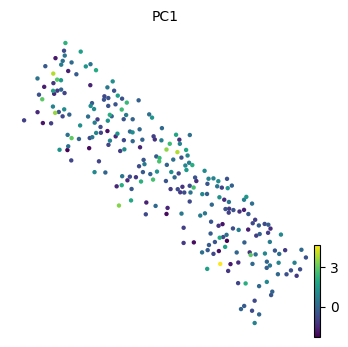

In [60]:
scv.pl.scatter(filtered_NR_l23_PC2_2, basis='stereo',color='PC1',cmap='viridis',legend_loc='right margin',figsize=(4,4),size=40)

In [61]:
sc.pp.pca(filtered_DR_l23_PC1)

In [62]:
filtered_DR_l23_PC1.obs['PC1']= filtered_DR_l23_PC1.obsm['X_pca'][:,0]

In [63]:
filtered_DR_l23_PC1_2 = filtered_DR_l23_PC1[filtered_DR_l23_PC1.obs['slice']=='DR1_2']

filtered_DR_l23_PC2_2 = filtered_DR_l23_PC1[filtered_DR_l23_PC1.obs['slice']=='DR2_2']

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


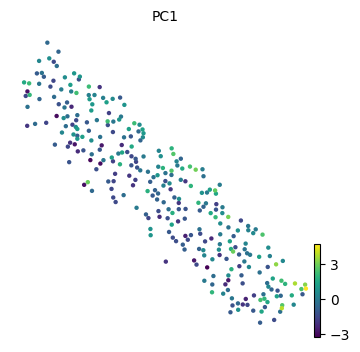

In [64]:
scv.pl.scatter(filtered_DR_l23_PC1_2, basis='stereo',color='PC1',cmap='viridis',legend_loc='right margin',figsize=(4,4),size=40)

Renamed 'stereo' to convention 'X_stereo' (adata.obsm).


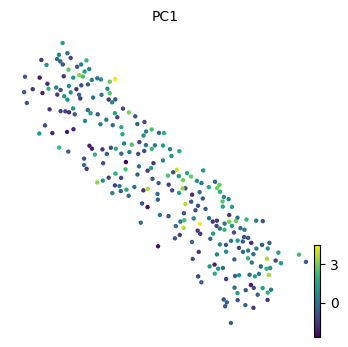

In [65]:
scv.pl.scatter(filtered_DR_l23_PC2_2, basis='stereo',color='PC1',cmap='viridis',legend_loc='right margin',figsize=(4,4),size=40)

In [66]:
l23_PC1 = NR_l23_PC1.concatenate(DR_l23_PC1,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [71]:
filtered_l23_PC1 = filtered_NR_l23_PC1.concatenate(filtered_DR_l23_PC1,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [72]:
l23_PC1.write_h5ad('l23_PC1_2_4.h5ad')

In [73]:
filtered_l23_PC1.write_h5ad('filtered_l23_PC1_2_4.h5ad')

In [29]:
l23_PC1_df = pd.read_csv('F:/spatial/V2L/V2L_L23_Lasso_PC1rank.xls', sep='\t')

In [30]:
RP_gene_order_df = pd.read_csv('F:/spatial/V2L/V2L_L23_RCG_pos_ordered.xls', sep='\t')
RN_gene_order_df = pd.read_csv('F:/spatial/V2L/V2L_L23_RCG_neg_ordered.xls', sep='\t')
NRP_gene_order_df = pd.read_csv('F:/spatial/V2L/V2L_L23_Non_RCG_pos_ordered.xls', sep='\t')
NRN_gene_order_df = pd.read_csv('F:/spatial/V2L/V2L_L23_Non_RCG_neg_ordered.xls', sep='\t')

In [31]:
RP_gene_order_list = RP_gene_order_df['Gene'].tolist()
RN_gene_order_list = RN_gene_order_df['Gene'].tolist()
NRP_gene_order_list = NRP_gene_order_df['Gene'].tolist()
NRN_gene_order_list = NRN_gene_order_df['Gene'].tolist()

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 数据准备
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)

# 定义基因集
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        l23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
n_rows, n_cols = len(genesets), len(slice_categories)

# 创建绘图布局
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5* n_cols,2.5* n_rows))

for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    if not geneset:
        for ax in axs[row_idx, :]:
            ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 vmin, vmax 和 g_min, g_max
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)  # vmin 和 vmax 为数据的最小值和最大值
            g_clipped = np.clip(g, vmin, vmax)  # 将数据限制在 vmin 和 vmax 范围内
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)  # 归一化到 [0, 1]
            slice_g_values[slice_category] = (g_norm, slice_data.obsm['stereo_rotated'][:, 0], slice_data.obsm['stereo_rotated'][:, 1])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]  # 基准 slice 的 g_min 和 g_max

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x, y = slice_g_values.get(slice_category, (None, None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 缩放公式
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x, y)

    # Step 4: 绘制每个 slice 的图
    for col_idx, slice_category in enumerate(slice_categories):
        ax = axs[row_idx, col_idx]
        adjusted_g, x, y = adjusted_g_values.get(slice_category, (None, None, None))

        if adjusted_g is None:
            ax.axis("off")
            continue
        # 绘制散点图，使用基准 slice 的颜色范围 [0, 1]
        scatter = ax.scatter(
            x, y,
            c=adjusted_g, cmap='seismic', s=10, alpha=1.0, vmin=0, vmax=1
        )

        # 设置标题
#        ax.set_title(f"{slice_category} - {geneset_name}", fontsize=10)
        ax.axis("off")

# 添加全局颜色条
#cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [左, 下, 宽度, 高度]
#cbar = fig.colorbar(
#    plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap='seismic'),
#    cax=cbar_ax,
#    orientation='horizontal'
#)
#cbar.set_label('Gene Expression (Adjusted)', fontsize=12)

# 添加总标题并调整位置
#plt.suptitle("Gene Expression with Slice-wise Clipping and Scaling (5%-95%)", fontsize=16, y=0.97)
plt.subplots_adjust(top=0.9, bottom=0.1)  # 调整布局，避免重叠
#plt.show()
output_path = "F:/spatial/V2L/Figure/V2L_l23_adjusted_g.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/Figure/V2L_l23_adjusted_g.pdf


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
# 数据准备
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)

# 定义基因集
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        l23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建 1列8行的图形布局
fig, axs = plt.subplots(8, 1, figsize=(4, 4 * len(genesets)), constrained_layout=True)

# 为每个 geneset 绘制一个折线图
for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    ax = axs[row_idx]  # 获取子图

    if not geneset:
        ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 g 值并缩放
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)
            g_clipped = np.clip(g, vmin, vmax)
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)
            slice_g_values[slice_category] = (g_norm, slice_data.obs['digital_layer'])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x = slice_g_values.get(slice_category, (None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 使用基准 slice 的缩放公式调整 g 值
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x)

    # Step 4: 合并 NR 和 DR 数据
    nr_g_values = []
    nr_x_values = []
    dr_g_values = []
    dr_x_values = []

    for slice_category in ['NR1_2', 'NR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            nr_g_values.append(g)
            nr_x_values.append(x)

    for slice_category in ['DR1_2', 'DR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            dr_g_values.append(g)
            dr_x_values.append(x)

    if nr_g_values:
        nr_g_values = np.concatenate(nr_g_values)
        nr_x_values = np.concatenate(nr_x_values)

    if dr_g_values:
        dr_g_values = np.concatenate(dr_g_values)
        dr_x_values = np.concatenate(dr_x_values)
    
    smooth_frac = 0.66  # 越大曲线越平滑

    NR_color = '#E7241D'
    DR_color = '#2372A9'
    
    # Step 5: 绘制综合后的折线图
    for g_values, x_values, color, label in zip(
        [nr_g_values, dr_g_values],
        [nr_x_values, dr_x_values],
        [NR_color, DR_color],
        ['NR', 'DR']
    ):
        if g_values.size > 0:
            bins = np.arange(min(x_values), max(x_values), 0.25)
            bin_centers = 0.5 * (bins[1:] + bins[:-1])

            # 计算每个 bin 的均值和标准差
            binned_means = [np.mean(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                            for i in range(len(bins) - 1)]
            binned_std = [np.std(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                          for i in range(len(bins) - 1)]
            # LOWESS 会返回和 bin_centers 对应长度的平滑值
            means_smooth = lowess(
                       binned_means, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )
            std_smooth = lowess(
                       binned_std, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )

            # 绘制平滑后的曲线
            ax.plot(bin_centers, means_smooth, color=color, label=label)

            # 绘制阴影：用平滑后的标准差 * 0.05
            ax.fill_between(
                 bin_centers,
                 means_smooth - std_smooth * 0.05,
                 means_smooth + std_smooth * 0.05,
                 color=color, alpha=0.1
             )

    # 设置图标题和标签
    ax.set_title(f"{geneset_name}", fontsize=14)
    ax.set_xlabel('Digital Layer', fontsize=12)
    ax.set_ylabel('Normalized Gene Expression', fontsize=12)

    ax.legend(title="Conditions", fontsize=10, loc="upper right")

# 添加总标题
plt.suptitle("Line Plots of Gene Expression across Conditions", fontsize=16, y=1.02)
#plt.show()
output_path = "F:/spatial/V2L/Figure/V2L_l23_adjusted_g_lineplot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/Figure/V2L_l23_adjusted_g_lineplot.pdf


In [39]:
filtered_l23 = filtered_NR_l23.concatenate(filtered_DR_l23,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [40]:
filtered_l23.write_h5ad('filtered_l23.h5ad')

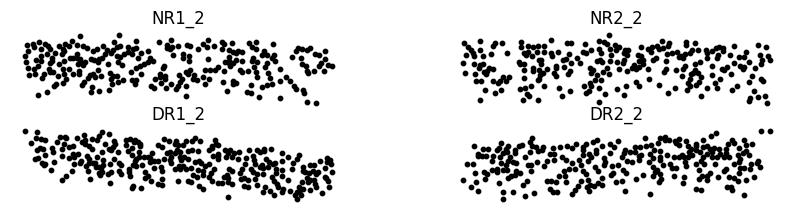

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvelo as scv

# 假设数据已经加载到 adata 中
adata = filtered_l23

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建子图，4个子图分别显示每个 slice
fig, axes = plt.subplots(2, 2, figsize=(10,2.5))  # 增加图像高度，确保有足够空间

# 设置旋转角度为 22.5 度
angle = -40 # 逆时针旋转 22.5 度
angle_rad = np.deg2rad(angle)  # 角度转换为弧度

# 旋转矩阵（逆时针旋转 22.5 度）
rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                            [np.sin(angle_rad), np.cos(angle_rad)]])  # 旋转矩阵

# 存储每个 slice 对应的旋转后的坐标
rotated_coords_dict = {}

# 为每个 slice 绘制图形
for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 获取当前 slice 的 'stereo' 坐标数据
    umap_coords = subset.obsm['stereo']  # 获取 UMAP 坐标数据
    
    # Step 2: 将坐标平移，使得图像围绕原点旋转
    x_shift = umap_coords[:, 0].max()  # x 轴最大值
    y_shift = umap_coords[:, 1].min()  # y 轴最小值
    
    # 平移坐标系
    translated_coords = umap_coords - [x_shift, y_shift]
    
    # Step 3: 应用旋转矩阵
    rotated_coords = translated_coords.dot(rotation_matrix)  # 应用旋转矩阵
    
    # Step 4: 将平移后的坐标恢复
    final_coords = rotated_coords + [x_shift, y_shift]

    # 存储旋转后的坐标到字典中
    rotated_coords_dict[slice_category] = final_coords  # 以 slice_category 为键，存储旋转后的坐标

    # Step 5: 使用 matplotlib 手动绘制旋转后的散点图，不显示 PC1
    ax.scatter(final_coords[:, 0], final_coords[:, 1], c='black', s=10)  # 使用黑色绘制点
    ax.set_title(slice_category)
    
    # Hide the axis
    ax.axis('off')  # 隐藏坐标轴

# 将所有 slice 的旋转后的坐标按顺序拼接成一个大的坐标数组
all_rotated_coords = np.vstack([rotated_coords_dict[slice_category] for slice_category in slice_categories])

# 将所有旋转后的坐标存储回 AnnData 对象的 obsm 中
adata.obsm['stereo_rotated'] = all_rotated_coords  # 存储所有旋转后的坐标

# 调整子图布局，确保子图和 colorbar 不重叠
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.2)  # 增加 bottom 参数，确保 colorbar 不遮挡

# 显示图形
plt.show()


In [77]:
adata.write_h5ad('filtered_l23_shifted.h5ad')

filtered_l23_shifted=adata

In [94]:
adata.write_h5ad('l23_PC1_shifted_2_4.h5ad')
l23_PC1.write_h5ad('l23_PC1_2_4.h5ad')
l23_PC1_shifted=adata

In [84]:
adata.write_h5ad('filtered_l23_PC1_shifted.h5ad')

filtered_l23_PC1_shifted=adata

In [32]:
filtered_l23_PC1_shifted=sc.read_h5ad('filtered_l23_PC1_shifted.h5ad')
l23_PC1_shifted=sc.read_h5ad('l23_PC1_shifted_2_4.h5ad')
filtered_l23_shifted=sc.read_h5ad('filtered_l23_shifted.h5ad')

Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).


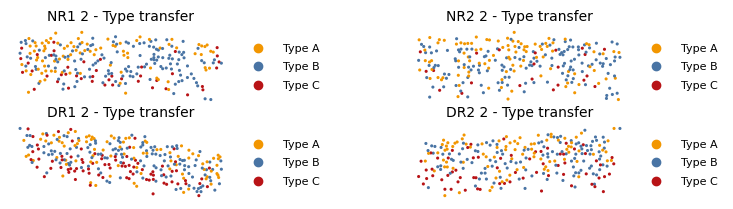

In [85]:
import scvelo as scv
import matplotlib.pyplot as plt
adata = filtered_l23_PC1_shifted
# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']


# 创建子图布局
fig, axes = plt.subplots(2, 2, figsize=(8, 2.5))

for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 获取 'Type_transfer' 列数据
    type_transfer_values = subset.obs['Type_transfer']
    
    # 绘制当前 slice 的 'Type_transfer' 的散点图
    scv.pl.scatter(subset, basis='stereo_rotated', color='Type_transfer', 
                    ax=ax, show=False, 
                   size=20, title=f'{slice_category} - Type_transfer',palette=["#f29600", "#4974a4", "#b81316"])

    # 获取当前图例对象
    legend = ax.get_legend()
    # 设置图例字体大小
    if legend is not None:
        for label in legend.get_texts():
            label.set_fontsize(8)  # 设置字体大小

# 调整子图布局
plt.subplots_adjust(hspace=0.3, wspace=0.8, bottom=0.2)

# 显示图形
plt.show()


In [113]:
adata = filtered_l23_PC1_shifted

# 设置 slice 分类
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# Step 1: 分别展示每个 slice 的散点图，并设置对应 colorbar 的最大值和最小值
fig, axes = plt.subplots(2, 2, figsize=(4, 2))

for i, slice_category in enumerate(slice_categories):
    ax = axes[i//2, i%2]  # 获取当前子图的位置
    # 筛选当前 slice 的数据
    subset = adata[adata.obs['slice'] == slice_category, :]
    
    # 计算当前 slice 的 PC1 的最小值和最大值
    pc1_slice_min = subset.obs['PC1'].min()
    pc1_slice_max = subset.obs['PC1'].max()
    
    # 绘制当前 slice 的散点图，colorbar 范围为该 slice 的 PC1 最小值和最大值
    scv.pl.scatter(subset, basis='stereo_rotated', color='PC1', cmap='viridis', 
                   vmin=pc1_slice_min, vmax=pc1_slice_max,  # 设置当前 slice 的 colorbar 范围
                    ax=ax, show=False, 
                   size=20, title=slice_category)
    
    # 获取 colorbar 对象
    cbar = ax.collections[0].colorbar
    # 设置 colorbar 的 ticks 为当前 slice 的最小值和最大值
    cbar.set_ticks([pc1_slice_min, pc1_slice_max])
    
    # 设置 colorbar 的标签
    cbar.set_label('PC1', fontsize=8)  # 设置 colorbar 标签字体大小

    # 调整刻度标签的字体大小
    cbar.ax.tick_params(labelsize=8)  # 设置刻度标签的字体大小
    # 设置 title 的字体大小
    ax.set_title(slice_category, fontsize=10)  # 设置 title 字体大小

# 调整子图布局
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.2)
# 显示图形
#plt.show()
# 保存为 PDF
output_path = "F:/spatial/V2L/Figure/V2L_l23_PC1.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")






Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
Renamed 'stereo_rotated' to convention 'X_stereo_rotated' (adata.obsm).
PDF saved as F:/spatial/V2L/Figure/V2L_l23_PC1.pdf


In [14]:
filtered_NR_l23_PC1 = filtered_l23_PC1_shifted[filtered_l23_PC1_shifted.obs['condition']=='NR']
filtered_DR_l23_PC1 = filtered_l23_PC1_shifted[filtered_l23_PC1_shifted.obs['condition']=='DR']

In [17]:
sns.kdeplot(
    data=filtered_NR_l23_PC1.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1.5, 4.5), (-4, 4)))
plt.text(0.95, 0.95, 'NR', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
#plt.show()
output_path = "F:/spatial/V2L/Figure/V2L_NR_l23_digital_layer&PC1.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()

print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/Figure/V2L_NR_l23_digital_layer&PC1.pdf


In [18]:
sns.kdeplot(
    data=filtered_DR_l23_PC1.obs, x="digital_layer", y="PC1",
    fill=True, thresh=0, levels=10, cmap="mako",clip=((1.5, 4.5), (-4, 4)))
plt.text(0.95, 0.95, 'DR', ha='center', va='center', transform=plt.gca().transAxes, color='white', fontsize=12)
#plt.show()
output_path = "F:/spatial/V2L/Figure/V2L_DR_l23_digital_layer&PC1.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/Figure/V2L_DR_l23_digital_layer&PC1.pdf


In [107]:
csv_file_path = 'F:\spatial\V2L\V2L_DR_predcell_freq5_8.csv'

# 读取 CSV 文件，并设置 'cell_id' 列为 index
all_spatial = pd.read_csv(csv_file_path, index_col='cell_id')
all_spatial_index = all_spatial.index.astype(str)
adata_index =filtered_DR_l23.obs.index.astype(str)

common_index = all_spatial_index.intersection(adata_index)

# Ensure the indices are of the same type (e.g., strings)

common_index = common_index.astype(str)
print(common_index)

Index(['5729', '5730', '5731', '5733', '5737', '5739', '5744', '5772', '7026',
       '7028',
       ...
       '13418', '13423', '13429', '13434', '14615', '14670', '14679', '14688',
       '14691', '14692'],
      dtype='object', length=567)


In [85]:
all_spatial

,Unnamed: 0,orig.ident,nCount_Spatial,nFeature_Spatial,area,coor_x,coor_y,areaL1,coor_x_ad,coor_y_ad,...,digital_layer,digital_column,sampleid,RSP_addline2,digital_layer_RSPagl,digital_column_RSPagl,predcell_ 5,predcell_ 6,predcell_ 7,predcell_ 8
cell_id,,,,,,,,,,,,,,,,,,,,,
19510,NR1_1_19510,Spatial,218,140,VISrl-L1,10563,20160,V2L,12981.04307,12184.25237,...,1.206566,5.207832,NR1_1,other,NaN,NaN,VLMC.ABC,VLMC.ABC,VLMC.ABC,VLMC.ABC
19511,NR1_1_19511,Spatial,88,66,VISrl-L1,10565,20217,V2L,12982.52657,12241.26815,...,1.000000,5.218045,NR1_1,other,NaN,NaN,NaN,NaN,NaN,NaN
19514,NR1_1_19514,Spatial,259,170,VISrl-L1,10576,20200,V2L,12970.50926,12224.97139,...,1.000000,5.218045,NR1_1,other,NaN,NaN,VLMC.ABC,VLMC.ABC,VLMC.ABC,VLMC.ABC
19517,NR1_1_19517,Spatial,145,107,VISrl-L1,10627,20218,V2L,12920.70326,12246.05129,...,1.149780,5.233666,NR1_1,other,NaN,NaN,VLMC.ABC,VLMC.ABC,VLMC.ABC,VLMC.ABC
19519,NR1_1_19519,Spatial,70,59,VISrl-L1,10644,20119,V2L,12897.69117,12148.27377,...,1.615413,5.234467,NR1_1,other,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11332,NR2_2_113327,Spatial,70,51,VISli-L1,17796,18842,V2L,15625.54241,10338.85146,...,1.121257,6.202225,NR2_2,other,NaN,NaN,NaN,NaN,NaN,NaN
11332,NR2_2_113328,Spatial,71,49,VISli-L1,17791,18870,V2L,15619.56827,10366.65990,...,1.000000,6.220641,NR2_2,other,NaN,NaN,NaN,NaN,NaN,NaN
11334,NR2_2_113341,Spatial,194,114,VISli-L1,17670,19016,V2L,15493.54665,10508.34812,...,1.000000,6.316726,NR2_2,other,NaN,NaN,VLMC.ABC,VLMC.ABC,VLMC.ABC,VLMC.ABC


In [108]:
# 确保 all_spatial.index 和 common_index 都是字符串类型
all_spatial_index = all_spatial.index.astype(str)

# 打印两个索引，检查它们的内容
print("common_index:")
print(common_index)
print("all_spatial_index:")
print(all_spatial_index)

# 找到 common_index 和 all_spatial.index 中的交集
valid_index = common_index.intersection(all_spatial_index)

# 打印交集部分的内容，确保它们正确
print(f"Valid index: {valid_index}")

# 使用 isin() 方法筛选数据，避免直接索引错误
spatial_common = all_spatial[all_spatial_index.isin(valid_index)]

# 查看结果
print(spatial_common)

common_index:
Index(['5729', '5730', '5731', '5733', '5737', '5739', '5744', '5772', '7026',
       '7028',
       ...
       '13418', '13423', '13429', '13434', '14615', '14670', '14679', '14688',
       '14691', '14692'],
      dtype='object', length=567)
all_spatial_index:
Index(['12115', '12120', '12123', '12126', '12129', '12130', '12131', '12132',
       '12133', '12134',
       ...
       '17868', '17881', '17882', '17884', '17886', '17887', '17890', '17894',
       '17904', '17908'],
      dtype='object', name='cell_id', length=6858)
Valid index: Index(['5729', '5730', '5731', '5733', '5737', '5739', '5744', '5772', '7026',
       '7028',
       ...
       '13418', '13423', '13429', '13434', '14615', '14670', '14679', '14688',
       '14691', '14692'],
      dtype='object', length=567)
          Unnamed: 0 orig.ident  nCount_Spatial  nFeature_Spatial       area  \
cell_id                                                                        
5729      DR1_2_5729    Spatial    

In [109]:
spatial_common = spatial_common.loc[~spatial_common.index.duplicated()]

In [110]:
# 将索引转换为字符串类型
filtered_DR_l23.obs.index = filtered_DR_l23.obs.index.astype(str)
spatial_common.index = spatial_common.index.astype(str)

# 重置索引并合并
l23_PC1_shifted_obs_reset = filtered_DR_l23.obs.reset_index()
spatial_common_reset = spatial_common.reset_index()

# 合并时使用对应的列
merged_df = l23_PC1_shifted_obs_reset.merge(
    spatial_common_reset[['cell_id', 'predcell_ 6']], 
    left_on='index', 
    right_on='cell_id', 
    how='left'
)
merged_df.set_index('index', inplace=True)
# 将合并结果存入 'RCTD' 列
filtered_DR_l23.obs['RCTD'] = merged_df['predcell_ 6']

# 查看结果
print(filtered_DR_l23.obs[['RCTD']])

                RCTD
5729         Oligo.0
5730   L2_3.IT.CTX.A
5731             NaN
5733   L2_3.IT.CTX.A
5737   L2_3.IT.CTX.A
...              ...
14670  L2_3.IT.CTX.C
14679  L4_5.IT.CTX.2
14688  L2_3.IT.CTX.C
14691          Astro
14692  L2_3.IT.CTX.B

[567 rows x 1 columns]


In [112]:
filtered_l23_shifted = filtered_NR_l23.concatenate(filtered_DR_l23,batch_categories=['NR', 'DR'],batch_key='condition',index_unique=None,join='outer')

In [113]:
filtered_l23_shifted.write_h5ad('filtered_l23_shifted.h5ad')

In [3]:
import scanpy as sc
filtered_l23_shifted=sc.read_h5ad('filtered_l23_shifted.h5ad')

In [9]:
filtered_l23_shifted

AnnData object with n_obs × n_vars = 1086 × 27103
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition', 'RCTD'
    obsm: 'X_stereo_rotated', 'stereo', 'stereo_rotated'
    layers: 'imputed', 'original_X'

In [20]:
NR_l23_PC1_2 = filtered_l23_shifted[filtered_l23_shifted.obs['slice']=='NR1_2']
NR_l23_PC2_2 = filtered_l23_shifted[filtered_l23_shifted.obs['slice']=='NR2_2']
DR_l23_PC1_2 = filtered_l23_shifted[filtered_l23_shifted.obs['slice']=='DR1_2']
DR_l23_PC2_2 = filtered_l23_shifted[filtered_l23_shifted.obs['slice']=='DR2_2']

In [13]:
NR_l23_PC1 =filtered_l23_shifted[filtered_l23_shifted.obs['condition']=='NR']
DR_l23_PC1 =filtered_l23_shifted[filtered_l23_shifted.obs['condition']=='DR']

In [73]:
NR_l23_PC1_2

View of AnnData object with n_obs × n_vars = 263 × 27103
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'area', 'coor_x', 'coor_y', 'areaL1', 'coor_x_ad', 'coor_y_ad', 'left_right', 'areaL2', 'ident', 'integration_partition_transfer', 'integration_partition_confidence', 'Subclass_transfer', 'Subclass_confidence', 'Type_transfer', 'Type_confidence', 'digital_layer', 'slice', 'condition', 'RCTD'
    obsm: 'stereo', 'stereo_rotated'
    layers: 'imputed', 'original_X'

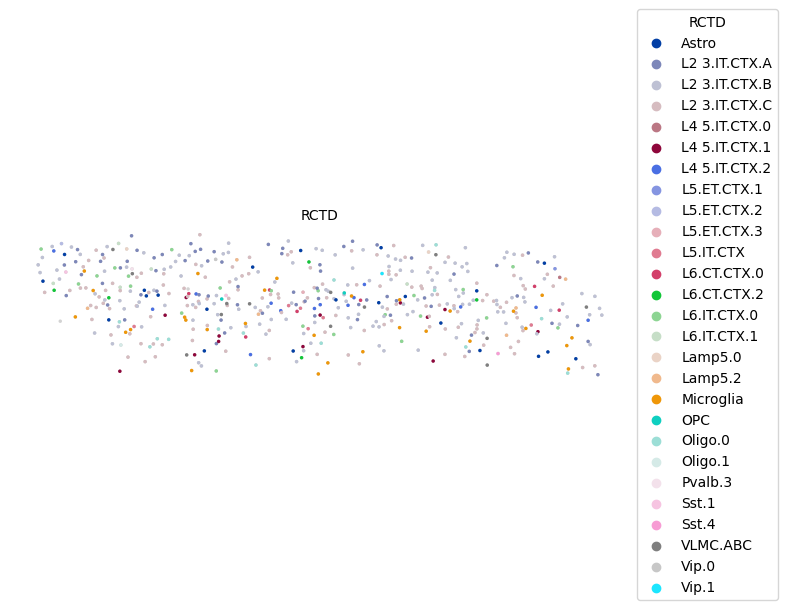

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用 Seaborn 调色板来确保颜色一致
palette = sns.color_palette("Set2", n_colors=len(NR_l23_PC1_2.obs['RCTD'].cat.categories))

# 绘制散点图
scv.pl.scatter(filtered_NR_l23, 
               basis='stereo_rotated', 
               color='RCTD', 
               cmap='Set2', 
               legend_loc='right margin', 
               figsize=(8, 2), 
               size=25, 
               show=False)

# 手动添加图例
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='RCTD')

plt.show()




In [84]:
import scvelo as scv
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Set2 调色板
set2_colors = sns.color_palette("Set2")
# 为已知类型指定颜色
palette = {'L2_3.IT.CTX.A': set2_colors[0], 
           'L2_3.IT.CTX.B': set2_colors[1], 
           'L2_3.IT.CTX.C': set2_colors[2]}  # 为不同类型设置颜色

# 确保 RCTD 列是类别型
filtered_l23_shifted.obs['RCTD'] = filtered_l23_shifted.obs['RCTD'].astype('category')

# 获取所有在 RCTD 列中出现的类型
all_rctd_types = filtered_l23_shifted.obs['RCTD'].cat.categories

# 为未指定的类型分配默认颜色
default_color = 'gray'  # 默认颜色为灰色
for rctd_type in all_rctd_types:
    if rctd_type not in palette:
        palette[rctd_type] = default_color  # 给所有未在 palette 中的类型分配灰色

# 定义切片和类型
slices = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
types = ['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C']

# 设置绘图区域：3行4列
fig, axs = plt.subplots(3, 4, figsize=(11, 5), constrained_layout=True)  # 使用axs

# 迭代每个切片和类型来生成子图
for i, slice_type in enumerate(slices):
    for j, t in enumerate(types):
        ax = axs[j, i]  # 获取对应的子图

        # 根据切片筛选数据
        slice_data = filtered_l23_shifted[filtered_l23_shifted.obs['slice'] == slice_type]

        # 绘制散点图，确保不显示图例
        scv.pl.scatter(slice_data, 
                       basis='stereo_rotated', 
                       color='RCTD', 
                       groups=[t], 
                       palette=palette,  # 使用完整的 palette
                       ax=ax, 
                       edgecolor=None, 
                       size=25,
                       legend_loc='lower center',  # 图例位置设置为图形上方居中
                       show=False)  # 避免多次调用plt.show()

# 设置布局并显示图形
plt.tight_layout()
#plt.show()
output_path = "F:/spatial/V2L/Figure/V2L_l23_RCTD.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/Figure/V2L_l23_RCTD.pdf


In [5]:
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt

# --- 配色和高亮类型 ---
highlight = ['L2_3.IT.CTX.A','L2_3.IT.CTX.B','L2_3.IT.CTX.C']
set2 = sns.color_palette("Set2", n_colors=len(highlight))

# 构造完整调色板：高亮类型用 Set2，其它都用灰色
all_types = filtered_l23_shifted.obs['RCTD'].cat.categories.tolist()
palette = {t: 'lightgray' for t in all_types}
for t, c in zip(highlight, set2):
    palette[t] = c

# --- 行是类型（3），列是切片（4） ---
types = highlight
slices = ['NR1_2','NR2_2','DR1_2','DR2_2']

fig, axs = plt.subplots(
    nrows=len(types),
    ncols=len(slices),
    figsize=(11, 5),
    constrained_layout=True
)

for i, typ in enumerate(types):
    for j, sl in enumerate(slices):
        ax = axs[i, j]
        # 只取当前 slice 数据
        slice_data = filtered_l23_shifted[filtered_l23_shifted.obs['slice']==sl]
        # 画出属于 typ 的细胞，其它细胞自动被当成灰色
        scv.pl.scatter(
            slice_data,
            basis='stereo_rotated',
            color='RCTD',
            groups=[typ],
            palette=palette,
            size=25,
            ax=ax,
            legend_loc='lower center',
            show=False
        )
        ax.set_title(f"{typ} — {sl}", fontsize=10)
        ax.axis('off')


#plt.show()
plt.savefig("F:/spatial/V2L/Figure/V2L_l23_RCTD.pdf", dpi=300, bbox_inches='tight')
plt.close()


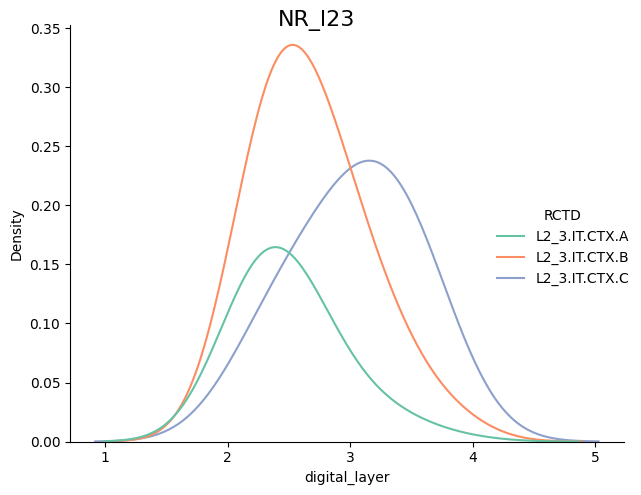

In [24]:
# 过滤只保留 'L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C' 的 RCTD 数据
filtered_data = filtered_NR_l23.obs[filtered_NR_l23.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('NR_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('V2L_NR_l23_kde.pdf', format='pdf')

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 filtered 是你的 DataFrame，只包含想画的那几类
groups = ['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C']
colors = sns.color_palette("Set2", n_colors=len(groups))
filtered = NR_l23_PC1.obs[NR_l23_PC1.obs['RCTD'].isin(groups)]

fig, ax = plt.subplots(figsize=(4,4))
for grp, col in zip(groups, colors):
    sub = filtered[filtered['RCTD'] == grp]
    sns.kdeplot(
        data=sub,
        x="digital_layer",
        color=col,       # ← 单条曲线指定颜色
        label=grp,
        common_norm=False,
        ax=ax
    )

#ax.legend(title="RCTD")


# 去掉上、右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Digital Layer')
#ax.set_ylabel('Density')
ax.set_title('NR Digital Layer Density by RCTD')

plt.tight_layout()
fig.savefig("V2L_NR_l23_kde.pdf", format='pdf', bbox_inches='tight')
plt.close(fig)


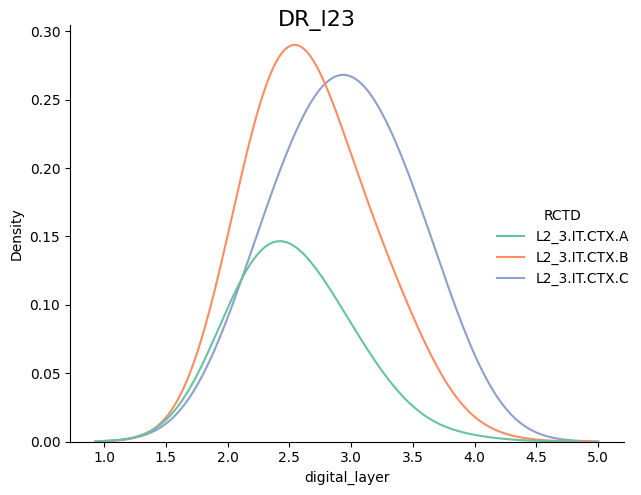

In [25]:
filtered_data = filtered_DR_l23.obs[filtered_DR_l23.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('DR_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('V2L_DR_l23_kde.pdf', format='pdf')

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 filtered 是你的 DataFrame，只包含想画的那几类
groups = ['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C']
colors = sns.color_palette("Set2", n_colors=len(groups))
filtered = DR_l23_PC1.obs[DR_l23_PC1.obs['RCTD'].isin(groups)]

fig, ax = plt.subplots(figsize=(4,4))
for grp, col in zip(groups, colors):
    sub = filtered[filtered['RCTD'] == grp]
    sns.kdeplot(
        data=sub,
        x="digital_layer",
        color=col,       # ← 单条曲线指定颜色
        label=grp,
        common_norm=False,
        ax=ax
    )

#ax.legend(title="RCTD")


# 去掉上、右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Digital Layer')
#ax.set_ylabel('Density')
ax.set_title('DR Digital Layer Density by RCTD')

plt.tight_layout()
fig.savefig("V2L_DR_l23_kde.pdf", format='pdf', bbox_inches='tight')
plt.close(fig)


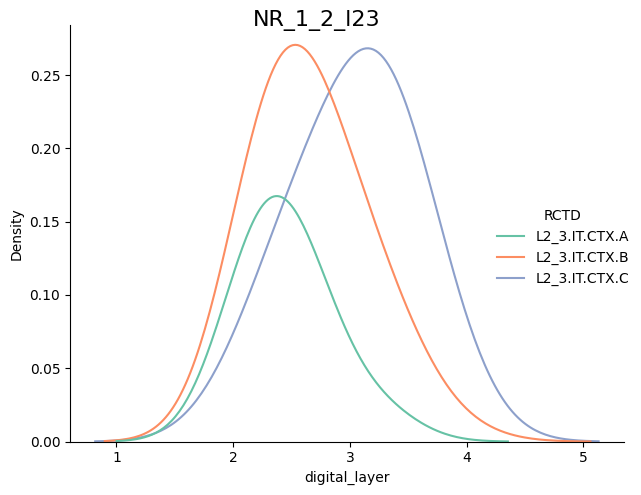

In [6]:
filtered_data = NR_l23_PC1_2.obs[NR_l23_PC1_2.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('NR_1_2_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('NR_1_2_l23.pdf', format='pdf')

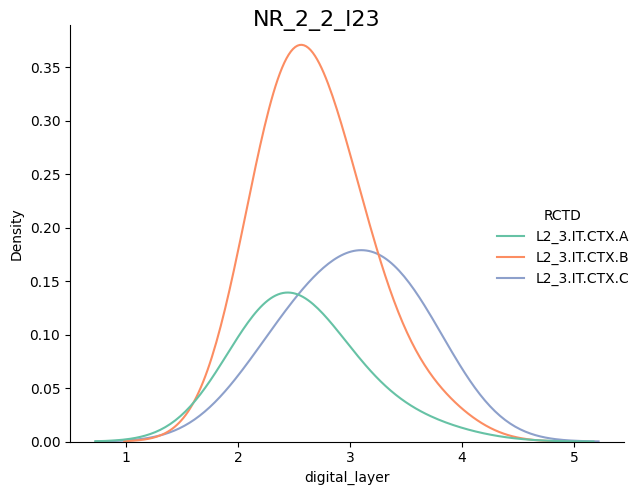

In [7]:
filtered_data = NR_l23_PC2_2.obs[NR_l23_PC2_2.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
               bw_adjust=2)

# 添加标题
g.fig.suptitle('NR_2_2_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('NR_2_2_l23.pdf', format='pdf')

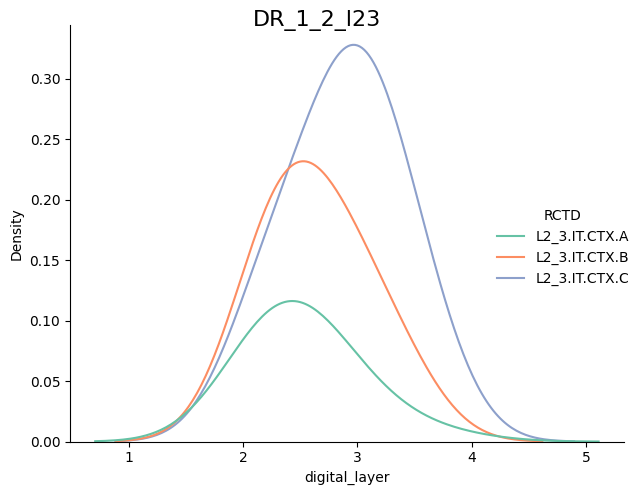

In [8]:
filtered_data = DR_l23_PC1_2.obs[DR_l23_PC1_2.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('DR_1_2_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('DR_1_2_l23.pdf', format='pdf')

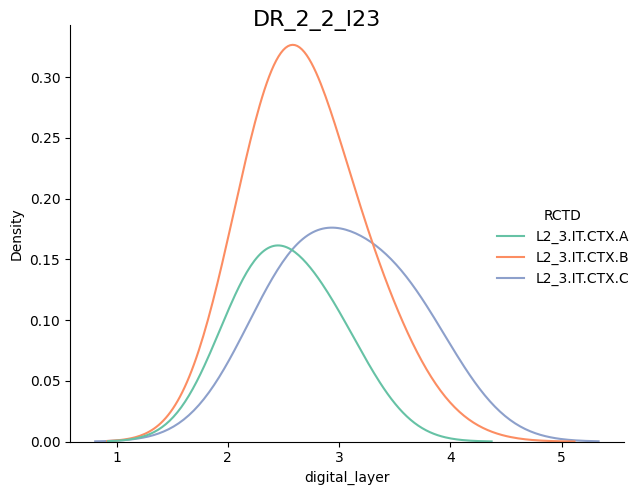

In [9]:
filtered_data = DR_l23_PC2_2.obs[DR_l23_PC2_2.obs['RCTD'].isin(['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'])]

# 绘制带有这些过滤条件的数据，同时限制图例显示特定类型
g = sns.displot(data=filtered_data, 
                x="digital_layer", 
                hue="RCTD", 
                kind='kde', 
                palette='Set2', 
                hue_order=['L2_3.IT.CTX.A', 'L2_3.IT.CTX.B', 'L2_3.IT.CTX.C'],
                bw_adjust=2)

# 添加标题
g.fig.suptitle('DR_2_2_l23', fontsize=16)
g.fig.tight_layout()  # 调整布局避免标题被遮挡
g.fig.subplots_adjust(top=0.95)  # 调整标题和图像之间的空间
g.fig.savefig('DR_2_2_l23.pdf', format='pdf')

In [78]:
V2L_marker = pd.read_csv('F:/spatial/V2L/V2L_all_marker_class_exp.xls', sep='\t',index_col='Gene')

In [79]:
# 创建一个空字典来存储基因集
gene_sets = {}

# 选择Class和Type列
V2L_marker_subset = V2L_marker[['Class', 'Type']]

# 定义一个函数来获取Class列交集的基因
def get_gene_set(class_values, type_value):
    """
    从DataFrame中获取Class列值在class_values列表中，并且Type列为type_value的基因。
    """
    return V2L_marker_subset[(V2L_marker_subset['Class'].isin(class_values)) & (V2L_marker_subset['Type'] == type_value)].index.tolist()

# 创建6个基因集
# 对于 NR_A, NR_B, NR_C：Class列是 Common + NR_specific，Type列是 A, B, C
for type_value in ['A', 'B', 'C']:
    gene_sets[f"NR_{type_value}"] = get_gene_set(class_values=['Common', 'NR_specific'], type_value=type_value)

# 对于 DR_A, DR_B, DR_C：Class列是 Common + DR_specific，Type列是 A, B, C
for type_value in ['A', 'B', 'C']:
    gene_sets[f"DR_{type_value}"] = get_gene_set(class_values=['Common', 'DR_specific'], type_value=type_value)

# 查看生成的基因集
for gene_set, genes in gene_sets.items():
    print(f"Gene set {gene_set} contains {len(genes)} genes: {genes[:5]}...")  # 显示前5个基因名称



Gene set NR_A contains 314 genes: ['4930412B13Rik', '4930467D21Rik', '4930505G20Rik', '5730522E02Rik', '6530403H02Rik']...
Gene set NR_B contains 122 genes: ['6330576A10Rik', '9330188P03Rik', '9630002D21Rik', 'Adam33', 'Adgrd1']...
Gene set NR_C contains 128 genes: ['4930486I03Rik', '4930533B01Rik', '9330154J02Rik', '9530036O11Rik', 'Abca1']...
Gene set DR_A contains 442 genes: ['4930412B13Rik', '4930467D21Rik', '4930505G20Rik', '5730522E02Rik', '6530403H02Rik']...
Gene set DR_B contains 211 genes: ['6330576A10Rik', '9330188P03Rik', '9630002D21Rik', 'Adam33', 'Adgrd1']...
Gene set DR_C contains 136 genes: ['4930486I03Rik', '4930533B01Rik', '9330154J02Rik', '9530036O11Rik', 'Abca1']...


In [80]:
# 创建一个ExcelWriter对象，指定保存的文件名
with pd.ExcelWriter("gene_sets.xlsx") as writer:
    # 对每个基因集，分别保存为一个工作表
    for key, gene_set in gene_sets.items():
        # 将每个基因集转换为DataFrame并写入对应的工作表
        df = pd.DataFrame(gene_set, columns=["Gene"])
        df.to_excel(writer, sheet_name=key, index=False)

print("Gene sets have been saved to 'gene_sets.xlsx'.")

Gene sets have been saved to 'gene_sets.xlsx'.


In [81]:
import matplotlib.pyplot as plt
import scvelo as scv
import numpy as np

# 设置切片
slices = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
slice_gene_sets = {
    'NR1_2': ['NR_A', 'NR_B', 'NR_C'],
    'NR2_2': ['NR_A', 'NR_B', 'NR_C'],
    'DR1_2': ['DR_A', 'DR_B', 'DR_C'],
    'DR2_2': ['DR_A', 'DR_B', 'DR_C']
}

# 创建一个4列3行的子图布局
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 4),constrained_layout=True)
axes = axes.flatten()  # 将二维数组展平，方便索引

# 计数器，用来确定在哪个子图位置绘制
subplot_idx = 0

# 创建一个列表用于保存所有表达量，用于colorbar
all_expression_values = []

# 为了存储所有归一化后的表达量，我们需要一个字典
normalized_expression_dict = {}

# 收集所有需要绘制的基因表达数据
for col_idx, slice_type in enumerate(slices):
    # 获取对应的基因集
    gene_sets_for_slice = slice_gene_sets[slice_type]
    
    # 获取该切片的数据
    slice_data = filtered_l23_shifted[filtered_l23_shifted.obs['slice'] == slice_type]
    
    # 为每个基因集绘制散点图
    for row_idx, gene_set_name in enumerate(gene_sets_for_slice):
        # 获取基因集的基因列表
        gene_set = gene_sets[gene_set_name]
        
        # 获取 gene_set 和 slice_data 中的基因的交集
        common_genes = list(set(gene_set) & set(slice_data.var_names))
        
        if len(common_genes) == 0:
            print(f"Warning: No valid genes from {gene_set_name} in {slice_type}")
            continue
        
        # 筛选出交集中的基因
        slice_data_filtered = slice_data[:, common_genes]
        
        # 计算基因集在该切片中的表达值（例如，取平均值或者总和）
        total_expression = slice_data_filtered.X.mean(axis=1)  # 每个细胞的平均表达值
        
        # 获取表达值的1%和99%分位数
        vmin = np.percentile(total_expression, 5)
        vmax = np.percentile(total_expression, 95)
        
        # 将小于1%的值设为1%的值，大于99%的值设为99%的值
        total_expression_clipped = np.clip(total_expression, vmin, vmax)
        
        # 获取对应的坐标
        stereo_coordinates = slice_data.obsm['stereo_rotated']
        
        # 绘制散点图
        ax = axes[row_idx * 4 + col_idx]  # 计算当前图的位置
        scatter = ax.scatter(stereo_coordinates[:, 0], stereo_coordinates[:, 1], c=total_expression_clipped, cmap='coolwarm', s=10)
        
        ax.set_title(f'{slice_type} - {gene_set_name}')
        ax.axis('off')  # 隐藏坐标轴
        
        # 保存表达量数据，用于colorbar
        all_expression_values.extend(total_expression_clipped)

# 添加colorbar
cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.02])  # 重新调整colorbar的位置，使其不重叠
norm = plt.Normalize(vmin=np.percentile(all_expression_values, 5), vmax=np.percentile(all_expression_values, 95))  # 设置colorbar的范围为5%-95%
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=norm), cax=cbar_ax, orientation='horizontal')

# 设置colorbar的刻度，只显示起始和终止标签
cbar.set_ticks([norm.vmin, norm.vmax])  # 设置colorbar的刻度
cbar.set_ticklabels([f'5%', f'95%'])  # 设置刻度标签为5%和95%

# 手动调整布局，使得图像不与colorbar重叠
plt.subplots_adjust(bottom=0.02)

# 显示结果
#plt.show()
output_path = "F:/spatial/V2L/V2L_l23_ABC.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/V2L/V2L_l23_ABC.pdf


In [43]:
# 获取 NR 和 DR 数据
NR_data = filtered_l23_shifted[filtered_l23_shifted.obs['condition'] == 'NR']
DR_data = filtered_l23_shifted[filtered_l23_shifted.obs['condition'] == 'DR']

# 假设 NR_gene_sets 和 DR_gene_sets 是这样的字典形式
NR_gene_sets = {
    'NR_A': gene_sets['NR_A'],
    'NR_B': gene_sets['NR_B'],
    'NR_C': gene_sets['NR_C']
}

DR_gene_sets = {
    'DR_A': gene_sets['DR_A'],
    'DR_B': gene_sets['DR_B'],
    'DR_C': gene_sets['DR_C']
}

In [44]:
# 查看 'digital_layer' 列的最小值和最大值
min_value = filtered_l23_shifted.obs['digital_layer'].min()
max_value = filtered_l23_shifted.obs['digital_layer'].max()

print(f"最小值: {min_value}")
print(f"最大值: {max_value}")

最小值: 2.000197609
最大值: 3.997065873


In [111]:
import numpy as np
adata = DR2_2
def rotate_spatial_coordinates(adata, angle=35, key='X_rotated', x_key='coor_x_ad', y_key='coor_y_ad'):
    # 获取原始坐标
    x = adata.obs[x_key]
    y = adata.obs[y_key]
    
    # 计算旋转中心（左下角）
    pivot_x = x.min()
    pivot_y = y.min()
    
    # 将角度转换为弧度
    theta = np.deg2rad(angle)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    # 计算旋转后的坐标
    # x_new = pivot_x + (x - pivot_x)*cos(theta) - (y - pivot_y)*sin(theta)
    # y_new = pivot_y + (x - pivot_x)*sin(theta) + (y - pivot_y)*cos(theta)
    x_rot = pivot_x + (x - pivot_x) * cos_theta - (y - pivot_y) * sin_theta
    y_rot = pivot_y + (x - pivot_x) * sin_theta + (y - pivot_y) * cos_theta
    
    # 存储旋转后的坐标到 adata.obsm
    adata.obsm[key] = np.column_stack((x_rot, y_rot))
    print(f"Rotated coordinates stored in adata.obsm['{key}'].")


rotate_spatial_coordinates(adata, angle=35, key='X_rotated')


Rotated coordinates stored in adata.obsm['X_rotated'].


In [112]:
DR2_2r = adata
DR2_2r.write_h5ad('DR2_2r.h5ad')

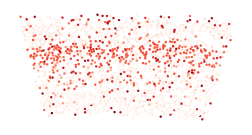

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = NR1_2r[NR1_2r.obs['digital_layer'].between(1.4, 10)]
data.X = np.nan_to_num(data.X)

# 目标基因
target_gene = 'Rorb'

# 检查目标基因是否存在于数据中
if target_gene in data.var_names:
    coords = data.obsm['X_rotated']
    x_rot = coords[:, 0]
    y_rot = coords[:, 1]
    
    # 获取目标基因在 "imputed" 层的表达数据，并转换为一维数组
    gene_expression = data[:, target_gene].layers['imputed'].toarray().flatten()
    
    # 对表达数据先进行 Z-score 标准化，再用 Min-Max 归一化到 [0, 1]
    gene_expression_zscore = zscore(gene_expression)
    gene_expression_normalized = (gene_expression_zscore - gene_expression_zscore.min()) / (gene_expression_zscore.max() - gene_expression_zscore.min())
    
    # 创建散点图，使用旋转后的坐标
    plt.figure(figsize=(3, 1.5))
    plt.scatter(x_rot, y_rot, c=gene_expression_normalized, cmap='Reds', s=0.5)
    
    # 去掉坐标轴
    plt.axis('off')
    plt.show()
else:
    print(f"{target_gene} 不存在于数据中，请检查基因名称。")


In [3]:
DR2_2r=sc.read_h5ad('DR2_2r.h5ad')
NR2_2r=sc.read_h5ad('NR2_2r.h5ad')
DR1_2r=sc.read_h5ad('DR1_2r.h5ad')
NR1_2r=sc.read_h5ad('NR1_2r.h5ad')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 目标基因列表
target_genes = ['Syt17','Stard8','Whrn','Rorb','Syt2','Tle4','Syt6']

slices_dict = {
    'NR1_2r': NR1_2r,
    'NR2_2r': NR2_2r,
    'DR1_2r': DR1_2r,
    'DR2_2r': DR2_2r
}

# 图形布局：行数 = 4（切片数），列数 = 9（目标基因数）
n_rows = len(slices_dict)
n_cols = len(target_genes)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 1.5), constrained_layout=True)

# 遍历每个切片（行）和每个目标基因（列）
for i, (slice_name, adata_slice) in enumerate(slices_dict.items()):
    subset = adata_slice[adata_slice.obs['digital_layer'].between(1.4, 10)]
    
    # 使用旋转后的坐标，假设存储在 obsm['X_rotated']
    coords = subset.obsm['X_rotated']
    x_rot = coords[:, 0]
    y_rot = coords[:, 1]
    
    for j, gene in enumerate(target_genes):
        ax = axs[i, j]
        # 检查目标基因是否存在
        if gene not in subset.var_names:
            ax.text(0.5, 0.5, f"{gene}\n不存在", ha="center", va="center", fontsize=8)
            ax.axis("off")
            continue

        # 获取该基因在 'imputed' 层的表达数据，并转换为一维数组
        expr = subset[:, gene].layers['imputed'].toarray().flatten()
        # 标准化：先 Z-score，再 Min-Max 归一化到 [0, 1]
        expr_z = zscore(expr)
        expr_norm = (expr_z - expr_z.min()) / (expr_z.max() - expr_z.min())
        
        # 绘制散点图，颜色根据归一化后的表达值
        sc = ax.scatter(x_rot, y_rot, c=expr_norm, cmap='magma_r', s=0.5)
        #ax.set_title(f"{slice_name}\n{gene}", fontsize=8)
        ax.axis("off")
        # 为每个子图添加独立的竖直 colorbar
        #cbar = fig.colorbar(sc, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
        #cbar.ax.tick_params(labelsize=6)

plt.suptitle("Rotated Spatial Expression of Target Genes", fontsize=16, y=1.02)
#plt.show()
output_path = "F:/spatial/V2L/Figure/V2L_imputation.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")


PDF saved as F:/spatial/V2L/Figure/V2L_imputation.pdf


In [36]:
df = pd.read_csv('F:/spatial/mean_corr_abs_merge_sorted.xls', sep='\t')
df[['gene_name', 'brain_region', 'layer']] = df['Gene'].str.split('_', expand=True)
# 筛选 brain 为 'V2L' 且 layer 为 'L2/3' 的条目
filtered_df = df[(df['brain_region'] == 'V2L') & (df['layer'] == 'L2/3')]

print(filtered_df.head())
print("筛选出的条目数量：", filtered_df.shape[0])
# 根据 "Type" 列的不同值将基因分组，形成基于类型的 geneset 字典
type_genesets = {}
for t in filtered_df['Type'].unique():
    type_genesets[t] = filtered_df[filtered_df['Type'] == t]['gene_name'].tolist()

print("基于 Type 列生成的 geneset:")
for t, genes in type_genesets.items():
    print(f"{t}: {len(genes)} genes, {genes[:5]}...")

                      Gene   NR_mean  clustering   DR_mean  Group        Type  \
0           Kcnh5_V2L_L2/3  0.255554           1  0.262363  DR-ON  Inhibition   
2         Gm32647_V2L_L2/3  0.464092           1  0.470414  DR-ON  Inhibition   
7   9530026P05Rik_V2L_L2/3  0.396493           1  0.402932  DR-ON  Inhibition   
9         Cntnap2_V2L_L2/3  0.401297           1  0.408116  DR-ON  Inhibition   
10        Arhgap6_V2L_L2/3  0.350119           1  0.356732  DR-ON  Inhibition   

        gene_name brain_region layer  
0           Kcnh5          V2L  L2/3  
2         Gm32647          V2L  L2/3  
7   9530026P05Rik          V2L  L2/3  
9         Cntnap2          V2L  L2/3  
10        Arhgap6          V2L  L2/3  
筛选出的条目数量： 196
基于 Type 列生成的 geneset:
Inhibition: 11 genes, ['Kcnh5', 'Gm32647', '9530026P05Rik', 'Cntnap2', 'Arhgap6']...
Disactivation: 77 genes, ['Grm3', 'Kctd8', 'Rasa3', '5031439G07Rik', 'Frmpd4']...
Activation: 38 genes, ['Brinp3', 'Gpc6', 'Egfem1', 'Unc5d', 'Inf2']...
TF-in

In [37]:
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)
def get_common_genes(gene_set, slope_condition):
    # 此处假设 l23_PC1_df 和 adata 已定义，RP_gene_order_list 等也已定义
    return list(set(gene_set).intersection(
        l23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

print("\n预定义的 8 个 geneset:")
for key, gene_list in genesets.items():
    print(f"{key}: {len(gene_list)} genes, {gene_list[:5]}...")

# 根据 Type 列生成的 geneset与上述 8 个 geneset分别取交集，形成新的 geneset
new_genesets = {}
for type_name, type_gene_list in type_genesets.items():
    for key, gene_list in genesets.items():
        common_genes = list(set(type_gene_list) & set(gene_list))
        # 如果交集非空，则存储
        if common_genes:
            new_geneset_name = f"{type_name}_{key}"
            new_genesets[new_geneset_name] = common_genes

print("\n新生成的 geneset（交集）:")
for name, genes in new_genesets.items():
    print(f"{name}: {len(genes)} genes, {genes[:5]}...")



预定义的 8 个 geneset:
RP_pos: 58 genes, ['Sdk2', 'Etv1', 'Gm48742', 'Egfem1', 'Rpl26']...
RP_neg: 48 genes, ['Brinp3', 'Lcorl', 'Pik3r3', 'Unc5d', 'Shisa4']...
RN_pos: 40 genes, ['Yes1', '9530026P05Rik', 'Gm32647', 'Dock2', 'Gm28153']...
RN_neg: 43 genes, ['Unc5c', 'Fam184a', 'Kctd8', 'Parm1', '1810062O18Rik']...
NRP_pos: 165 genes, ['Gm28750', 'Ppp1r18', 'Itm2b', 'Rcbtb2', 'Sh3bp4']...
NRP_neg: 82 genes, ['Zmat4', 'Pde7b', 'Ppp1r16b', 'Gm16122', 'Cdh18']...
NRN_pos: 184 genes, ['Exoc6b', 'Gm29114', 'Shtn1', 'Dse', 'Plcxd3']...
NRN_neg: 97 genes, ['Gbe1', 'Bicc1', 'Sat1', 'Retreg1', 'Tln1']...

新生成的 geneset（交集）:
Inhibition_RN_pos: 7 genes, ['Dpyd', '9530026P05Rik', 'Gm32647', 'Cdh9', 'Zfp804b']...
Inhibition_RN_neg: 4 genes, ['Gm17231', 'Hs6st3', 'Kcnh5', 'Cntnap2']...
Disactivation_RN_pos: 33 genes, ['Yes1', 'Dock2', 'Smap2', 'Pid1', 'Shroom2']...
Disactivation_RN_neg: 39 genes, ['Unc5c', 'Fam184a', 'Kctd8', 'Parm1', '1810062O18Rik']...
Activation_RP_pos: 20 genes, ['Sdk2', 'Egfem1', 'Zh

In [87]:
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)
genesets = new_genesets
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']
n_rows, n_cols = len(genesets), len(slice_categories)

# 创建绘图布局
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 2.5 * n_rows))

for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    if not geneset:
        for ax in axs[row_idx, :]:
            ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 vmin, vmax 和 g_min, g_max
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)  # vmin 和 vmax 为数据的最小值和最大值
            g_clipped = np.clip(g, vmin, vmax)  # 将数据限制在 vmin 和 vmax 范围内
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)  # 归一化到 [0, 1]
            slice_g_values[slice_category] = (g_norm, slice_data.obsm['stereo_rotated'][:, 0], slice_data.obsm['stereo_rotated'][:, 1])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]  # 基准 slice 的 g_min 和 g_max

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x, y = slice_g_values.get(slice_category, (None, None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 缩放公式
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x, y)

    # Step 4: 绘制每个 slice 的图
    for col_idx, slice_category in enumerate(slice_categories):
        ax = axs[row_idx, col_idx]
        adjusted_g, x, y = adjusted_g_values.get(slice_category, (None, None, None))

        if adjusted_g is None:
            ax.axis("off")
            continue

        # 绘制散点图，使用基准 slice 的颜色范围 [0, 1]
        scatter = ax.scatter(
            x, y,
            c=adjusted_g, cmap='seismic', s=10, alpha=1.0, vmin=0, vmax=1
        )

        # 设置标题
#        ax.set_title(f"{slice_category} - {geneset_name}", fontsize=10)
        ax.axis("off")

# 添加全局颜色条
#cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [左, 下, 宽度, 高度]
#cbar = fig.colorbar(
#    plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=1), cmap='seismic'),
#    cax=cbar_ax,
#    orientation='horizontal'
#)
#cbar.set_label('Gene Expression (Adjusted)', fontsize=12)

# 添加总标题并调整位置
#plt.suptitle("Gene Expression with Slice-wise Clipping and Scaling (5%-95%)", fontsize=16, y=0.97)
plt.subplots_adjust(top=0.9, bottom=0.1)  # 调整布局，避免重叠
#plt.show()
output_path = "F:/spatial/V2L/Figure/V2L_l23_TF_adjusted_g.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/Figure/V2L_l23_TF_adjusted_g.pdf


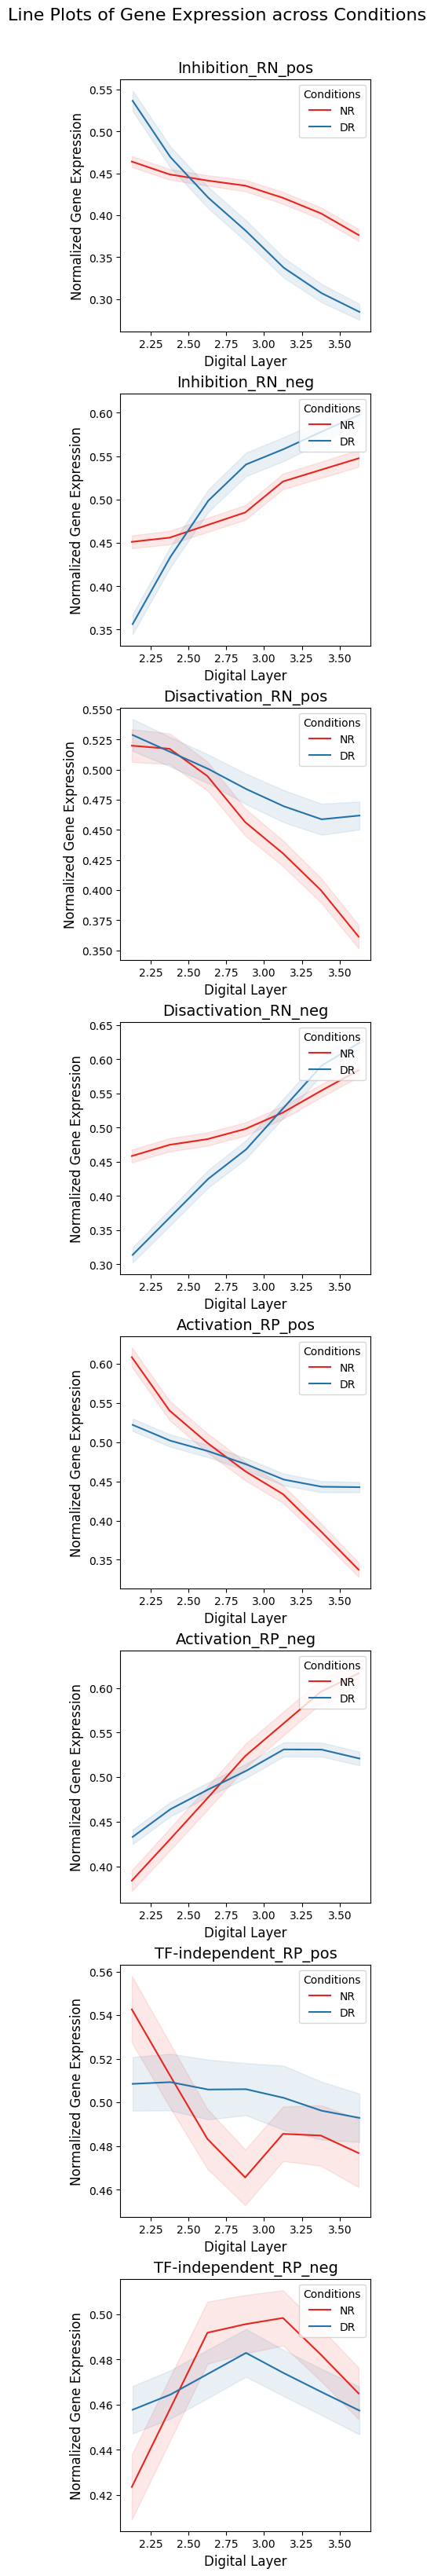

In [107]:
adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)
genesets = new_genesets
slice_categories = ['NR1_2', 'NR2_2', 'DR1_2', 'DR2_2']

# 创建 1列8行的图形布局
fig, axs = plt.subplots(8, 1, figsize=(4, 4 * len(genesets)), constrained_layout=True)

# 为每个 geneset 绘制一个折线图
for row_idx, (geneset_name, geneset) in enumerate(genesets.items()):
    ax = axs[row_idx]  # 获取子图

    if not geneset:
        ax.axis("off")
        continue

    slice_g_values = {}
    slice_gmin_gmax = {}
    slice_vmin_vmax = {}
    vmax_vmin_diffs = {}

    # Step 1: 计算每个 slice 的 g 值并缩放
    for slice_category in slice_categories:
        slice_data = adata[adata.obs['slice'] == slice_category]
        if slice_data.n_obs > 0:
            g = slice_data[:, geneset].X.mean(axis=1).flatten()
            vmin, vmax = np.percentile(g, 5), np.percentile(g, 95)
            g_clipped = np.clip(g, vmin, vmax)
            g_min, g_max = np.min(g_clipped), np.max(g_clipped)
            g_norm = (g_clipped - g_min) / (g_max - g_min)
            slice_g_values[slice_category] = (g_norm, slice_data.obs['digital_layer'])
            slice_gmin_gmax[slice_category] = (g_min, g_max)
            slice_vmin_vmax[slice_category] = (vmin, vmax)
            vmax_vmin_diffs[slice_category] = vmax - vmin

    # Step 2: 选择基准 slice（vmax - vmin 最大的 slice）
    base_slice = max(vmax_vmin_diffs, key=vmax_vmin_diffs.get)
    base_gmin, base_gmax = slice_gmin_gmax[base_slice]

    # Step 3: 调整其他 slice 的 g 值
    adjusted_g_values = {}
    for slice_category in slice_categories:
        g_norm, x = slice_g_values.get(slice_category, (None, None))
        g_min, g_max = slice_gmin_gmax.get(slice_category, (None, None))
        if g_norm is not None:
            # 使用基准 slice 的缩放公式调整 g 值
            g_adjusted = 0.5 + (g_norm - 0.5) * (g_max - g_min) / (base_gmax - base_gmin)
            adjusted_g_values[slice_category] = (g_adjusted, x)

    # Step 4: 合并 NR 和 DR 数据
    nr_g_values = []
    nr_x_values = []
    dr_g_values = []
    dr_x_values = []

    for slice_category in ['NR1_2', 'NR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            nr_g_values.append(g)
            nr_x_values.append(x)

    for slice_category in ['DR1_2', 'DR2_2']:
        if slice_category in adjusted_g_values:
            g, x = adjusted_g_values[slice_category]
            dr_g_values.append(g)
            dr_x_values.append(x)

    if nr_g_values:
        nr_g_values = np.concatenate(nr_g_values)
        nr_x_values = np.concatenate(nr_x_values)

    if dr_g_values:
        dr_g_values = np.concatenate(dr_g_values)
        dr_x_values = np.concatenate(dr_x_values)

    smooth_frac = 0.66  # 越大曲线越平滑

    NR_color = '#E7241D'
    DR_color = '#2372A9'    

    # Step 5: 绘制综合后的折线图
    for g_values, x_values, color, label in zip(
        [nr_g_values, dr_g_values],
        [nr_x_values, dr_x_values],
        [NR_color, DR_color],
        ['NR', 'DR']
    ):
        if g_values.size > 0:
            bins = np.arange(min(x_values), max(x_values), 0.25)
            bin_centers = 0.5 * (bins[1:] + bins[:-1])

            # 计算每个 bin 的均值和标准差
            binned_means = [np.mean(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                            for i in range(len(bins) - 1)]
            binned_std = [np.std(g_values[(x_values >= bins[i]) & (x_values < bins[i + 1])])
                          for i in range(len(bins) - 1)]

            # LOWESS 会返回和 bin_centers 对应长度的平滑值
            means_smooth = lowess(
                       binned_means, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )
            std_smooth = lowess(
                       binned_std, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )

            # 绘制平滑后的曲线
            ax.plot(bin_centers, means_smooth, color=color, label=label)

            # 绘制阴影：用平滑后的标准差 * 0.05
            ax.fill_between(
                 bin_centers,
                 means_smooth - std_smooth * 0.05,
                 means_smooth + std_smooth * 0.05,
                 color=color, alpha=0.1
             )

    # 设置图标题和标签
    ax.set_title(f"{geneset_name}", fontsize=14)
    #ax.set_ylim(0.2, 0.8)
    ax.set_xlabel('Digital Layer', fontsize=12)
    ax.set_ylabel('Normalized Gene Expression', fontsize=12)

    ax.legend(title="Conditions", fontsize=10, loc="upper right")

# 添加总标题
plt.suptitle("Line Plots of Gene Expression across Conditions", fontsize=16, y=1.02)
plt.show()
#output_path = "F:/spatial/V2L/Figure/V2L_l23_TF_adjusted_lineplot.pdf"
#plt.savefig(output_path, format='pdf', bbox_inches='tight')
#plt.close()
#print(f"PDF saved as {output_path}")

In [108]:
import scvelo as scv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

adata = l23_PC1_shifted
adata.X = np.nan_to_num(adata.X)

genes = ['Fgf13','Nell1','9530026P05Rik','Kctd8','4930419G24Rik','Sox5','Pex5l','Vmp1']
slices = ['NR1_2','NR2_2','DR1_2','DR2_2']

fig, axes = plt.subplots(len(genes), len(slices),
                         figsize=(len(slices)*4, len(genes)*1.75),
                         constrained_layout=True)

for i, gene in enumerate(genes):
    for j, sl in enumerate(slices):
        ax = axes[i, j]
        sub = adata[adata.obs['slice']==sl, :]
        expr = np.asarray(sub[:, gene].X).flatten()
        
        # 计算每张图自己专属的 vmin/vmax
        vmin, vmax = np.percentile(expr, 5), np.percentile(expr, 95)
        expr = np.clip(expr, vmin, vmax)
        
        # 直接用 ax.scatter，传 vmin/vmax
        scatter = ax.scatter(sub.obsm['stereo_rotated'][:,0],
                             sub.obsm['stereo_rotated'][:,1],
                             c=expr,
                             cmap='coolwarm',
                             vmin=vmin, vmax=vmax,
                             s=10,
                             alpha=1.0)
        # 去掉子图的所有外边框
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.set_xticks([]); ax.set_yticks([])

        # 给当前子图加一个“窄又短”的色条
        cbar = fig.colorbar(
            scatter, ax=ax,
            orientation='vertical',
            fraction=0.03,    # 色条本身厚度占 subplot 高度的比例
            shrink=0.6,       # 色条长度占 subplot 高度的比例
            pad=0.02          # 色条与 subplot 之间的距离
        )
        cbar.ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
        cbar.ax.tick_params(labelsize=20)

# 最后全局调整一下子图间距
plt.subplots_adjust(wspace=0.4, hspace=0.4)
#plt.show()
output_path = "F:/spatial/V2L/Figure/V2L_l23_TF_gene.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/Figure/V2L_l23_TF_gene.pdf


In [20]:
import numpy as np
import pandas as pd

# 假设 new_genesets 是一个 {geneset_name: [gene1, gene2, …]} 的字典
# 我们先把所有子集中出现过的基因汇总为一个列表
all_genes = sorted({
    gene
    for gene_list in new_genesets.values()
    for gene in gene_list
})

# 接下来直接用 all_genes 来替代原来的固定列表
genes = all_genes
conditions = ['NR', 'DR']
bin_width = 0.25

# 确保 adata 已经预处理好
adata = l23_PC1_shifted.copy()
adata.X = np.nan_to_num(adata.X)

results = []
for gene in genes:
    slopes = {}
    for cond in conditions:
        cd = adata[adata.obs['condition'] == cond]
        expr = cd[:, gene].X.toarray().flatten()
        layer = cd.obs['digital_layer'].astype(float).values

        bins = np.arange(layer.min(), layer.max() + bin_width, bin_width)
        centers = 0.5 * (bins[:-1] + bins[1:])
        means = []
        for i in range(len(bins)-1):
            m = (layer >= bins[i]) & (layer < bins[i+1])
            means.append(expr[m].mean() if m.sum()>0 else np.nan)
        means = np.array(means)
        valid = ~np.isnan(means)
        if valid.sum() < 2:
            slope = np.nan
        else:
            slope = (means[valid][-1] - means[valid][0]) / (centers[valid][-1] - centers[valid][0])
        slopes[cond] = slope

    results.append({
        'gene': gene,
        'slope_NR': slopes.get('NR', np.nan),
        'slope_DR': slopes.get('DR', np.nan),
        'abs_diff': abs(slopes.get('NR', np.nan) - slopes.get('DR', np.nan))
    })

df = pd.DataFrame(results)
best = df.loc[df['abs_diff'].idxmax()]

top10 = df.sort_values('abs_diff', ascending=False).head(10)

# 显示结果
print(top10[['gene', 'slope_NR', 'slope_DR', 'abs_diff']])


              gene  slope_NR  slope_DR  abs_diff
5    9530026P05Rik  0.019905 -0.116600  0.136505
41         Col19a1  0.000000  0.117439  0.117439
108         Pcdh15  0.023154 -0.085013  0.108168
75            Grm8 -0.013452  0.094020  0.107472
40        Cntnap5a -0.105872  0.000000  0.105872
157          Synj2 -0.066774  0.034552  0.101326
55           Fgf13 -0.069198  0.024422  0.093620
83           Kctd8  0.041587  0.134860  0.093273
69         Gm32647 -0.000363 -0.086105  0.085742
62         Gm15398  0.001033 -0.081745  0.082778


In [40]:
def get_common_genes(gene_set, slope_condition):
    return list(set(gene_set).intersection(
        l23_PC1_df.query(slope_condition)['Gene']).intersection(adata.var_names))

genesets = {
    'RP_pos': get_common_genes(RP_gene_order_list, "NR_slope > 0"),
    'RP_neg': get_common_genes(RP_gene_order_list, "NR_slope < 0"),
    'RN_pos': get_common_genes(RN_gene_order_list, "NR_slope > 0"),
    'RN_neg': get_common_genes(RN_gene_order_list, "NR_slope < 0"),
    'NRP_pos': get_common_genes(NRP_gene_order_list, "NR_slope > 0"),
    'NRP_neg': get_common_genes(NRP_gene_order_list, "NR_slope < 0"),
    'NRN_pos': get_common_genes(NRN_gene_order_list, "NR_slope > 0"),
    'NRN_neg': get_common_genes(NRN_gene_order_list, "NR_slope < 0"),
}

import pandas as pd

slopes = (
    l23_PC1_df[['Gene','NR_slope','DR_slope']]
    .dropna(subset=['NR_slope','DR_slope'])
    .copy()
)
# 计算差值列
slopes['diff'] = (slopes['NR_slope'] - slopes['DR_slope']).abs()

# 2) 对每个 geneset 单独筛选并取 top10
top10_per_set = {}
for set_name, gene_list in genesets.items():
    sub = slopes[slopes['Gene'].isin(gene_list)]
    top10 = (
        sub
        .sort_values('diff', ascending=False)
        .head(10)
        .reset_index(drop=True)
    )
    top10_per_set[set_name] = top10[['Gene','NR_slope','DR_slope','diff']]

# 3) 打印结果
for set_name, df_top in top10_per_set.items():
    print(f"\n=== {set_name} (top 10) ===")
    print(df_top.to_string(index=False))



=== RP_pos (top 10) ===
    Gene  NR_slope  DR_slope     diff
  Egfem1  0.008126 -0.000075 0.008202
Cntnap5a  0.009639  0.002099 0.007540
 Kirrel3  0.022543  0.017823 0.004721
   Fgf13  0.003596 -0.000622 0.004218
    Gpc6  0.013961  0.010168 0.003793
  Gabrg3  0.002538 -0.000903 0.003441
  Lingo2  0.001951 -0.000769 0.002721
   Nr3c2  0.001677 -0.001001 0.002678
    Ssh2  0.002966  0.000463 0.002503
   Agap1  0.004870  0.002766 0.002104

=== RP_neg (top 10) ===
      Gene  NR_slope  DR_slope     diff
    Pcdh15 -0.004275  0.005499 0.009775
   Gm15398 -0.002052  0.004452 0.006504
    Brinp3 -0.007941 -0.001828 0.006114
St6galnac3 -0.003098  0.001063 0.004161
     Nell1 -0.005543 -0.001634 0.003909
      Fgf1 -0.003414 -0.000406 0.003009
    Sorcs3 -0.006852 -0.004019 0.002833
     Unc5d -0.010041 -0.007216 0.002825
      Inf2 -0.002312 -0.000566 0.001745
    Srgap2 -0.002025 -0.000351 0.001674

=== RN_pos (top 10) ===
         Gene  NR_slope  DR_slope     diff
         Dpyd  0.009989 

In [101]:
import matplotlib.ticker as mticker
genes = ['Fgf13','Nell1','9530026P05Rik','Kctd8','4930419G24Rik','Sox5','Pex5l','Vmp1']

# 设置条件（NR 和 DR）
conditions = ['NR', 'DR']
condition_colors = {
    'NR': '#E7241D',   
    'DR': '#2372A9'    
}

# 设置 bin 宽度
bin_width = 0.25

# 创建子图布局，纵向显示不同gene
fig, axes = plt.subplots(len(genes), 1, figsize=(3.2, 4 * len(genes)))

smooth_frac = 0.66  # 越大曲线越平滑

# 为每个基因绘制折线图
for i, gene in enumerate(genes):
    ax = axes[i]  # 获取当前子图位置
    
    for condition in conditions:
        color = condition_colors[condition]
        # 获取当前条件的数据
        condition_data = l23_PC1_shifted[l23_PC1_shifted.obs['condition'] == condition]
        
        # 获取基因表达值和 digital_layer 数据
        gene_expression = condition_data[:, gene].X.toarray().flatten()
        digital_layer = condition_data.obs['digital_layer'].values
        
        # 创建 bins，范围从 min 到 max，步长为 bin_width
        bins = np.arange(min(digital_layer), max(digital_layer), bin_width)
        bin_centers = 0.5 * (bins[1:] + bins[:-1])
        
        # 计算每个 bin 的均值和标准差
        binned_means = [np.mean(gene_expression[(digital_layer >= bins[i]) & (digital_layer < bins[i + 1])])
                        for i in range(len(bins) - 1)]
        binned_std = [np.std(gene_expression[(digital_layer >= bins[i]) & (digital_layer < bins[i + 1])])
                      for i in range(len(bins) - 1)]
        # LOWESS 会返回和 bin_centers 对应长度的平滑值
        means_smooth = lowess(
                       binned_means, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )
        std_smooth = lowess(
                       binned_std, 
                       bin_centers, 
                       frac=smooth_frac, 
                       return_sorted=False
             )

        # 绘制平滑后的曲线
        ax.plot(bin_centers, means_smooth,color=color,label=f'{condition}')

        # 绘制阴影：用平滑后的标准差 * 0.05
        ax.fill_between(
                 bin_centers,
                 means_smooth - std_smooth * 0.05,
                 means_smooth + std_smooth * 0.05,
                 alpha=0.1,color=color
             ) 
    
    # 设置图标题和标签
    ax.set_title(f"Gene Expression for {gene}", fontsize=14)
    ax.set_xlabel('Spatial depth', fontsize=10)
    ax.set_ylabel('Gene Expression', fontsize=10)
    # 横坐标只显示 0 和 1

    ax.xaxis.set_major_locator(mticker.FixedLocator([0, 1]))
    ax.xaxis.set_major_formatter(mticker.FixedFormatter(['0', '1']))
    
    # 纵坐标保留一位小数
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    
    # 设置图例
    #ax.legend(title="Conditions", fontsize=10, loc="upper right")

# 调整子图布局
plt.subplots_adjust(hspace=0.4)
#plt.show()
output_path = "F:/spatial/V2L/Figure/V2L_l23_TF_gene_lineplot.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.close()
print(f"PDF saved as {output_path}")

PDF saved as F:/spatial/V2L/Figure/V2L_l23_TF_gene_lineplot.pdf
